# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. The College Board seeks to track statewide participation and recommends where money is best spent to improve SAT participation rates.

My problem statement is:
How the College Board might work to increase the participation rate in Kansas?

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##  2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
pth = "../data/"
sat_2017 = pd.read_csv(pth +"sat_2017.csv")
act_2017 = pd.read_csv(pth + "act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answers:There are two datasets, the first dataset is sat_2017. sat_2017 is a breakdown of the average SAT score (2017 cohort) in each United States (US) state according to the 2017 SAT Suite of Assessments Annual Report. 

sat_2017 consists of 51 rows by 5 columns. Each row represents an US state in relation to its individual (column): 

* SAT Participation Rate (string, in %) 
* Average Evidence-Based Reading and Writing Score (integer,out of 800)
* Average Math Score (integer,out of 800)
* Total Average Score (integer,out of 1600) 

The second dataset is act_2017. act_2017 is a breakdown of the average ACT score (2017 cohort) in each US state by subject. 

act_2017 consists of 52 rows by 7 columns. Each row represents an US state in relation to its individual (column):

* ACT Participation Rate (string, in %) 
* Average English Score (float)
* Average Math Score (float)
* Average Reading Score (float)
* Average Science Score (float)
* Average Composite Score (float,out of 36) 

Comparing sat_2017 and act_2017, sat_2017 has 51 entries compared to 52 entries in act_2017. act_2017 had included national average for each subject however sat_2017 did not include national average. The national average row in act_2017 can be removed as it is not a state. 

Secondly, sat_2017's subjects were scored out of 800 while act_2017 were scored based on a scale score out of 36. To facilitate a meaningful comparision, both datasets were have to be merged and data normalised. 

#### 4a. Does the data look complete? 

Answers:The data does not look complete, it would be much better if the following were included:

1. The exact number of students in each state who took either SAT or ACT. Reason being, some state may have a very small participation percentage but the exact number of students might be higher than those states that have higher participation percentage because the state has many more students. 
2. The total number of students for the year in each state. Same reason as point 1. 
3. The population of each state and general demographics. Assess the student population to general population, some state may face ageing problem or low birth rate or low disposable income that might contribute to low participation or bias towards one test (ACT or ACT). 
4. The type of schools (Public or Private) that participated in SAT or ACT. Might show some trend on participation percentage and average score.  

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
sat_2017[sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [10]:
act_2017[act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answers:The minimum score for sat_2017 Math is 52, it seems to be an outlier. Upon checking, the score belongs to state of Maryland. Comparing to the original dataset, there seems to be data entry error. Maryland's average math score should be 524 instead of 52.

The minimum score for act_2017 Science is 2.3, it seems to be an outlier. Upon checking, the score belongs to state of Maryland. Comparing to the original dataset, there seems to be data entry error. Maryland's average science score should be 23.2 instead of 2.3.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
# sat_2017.set_value(20,'Math', 524)
sat_2017.at[20,'Math'] = 524

In [12]:
#act_2017.set_value(21,'Science', 23.2)
act_2017.at[21,'Science'] = 23.2

In [13]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [14]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [16]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answers:The participation's datatype indicate as 'object' for both sat_2017 and act_2017 while it should be float. 

The composite category for act_2017 is set as 'object' while it should be float as it is a scaled cumulation of the averages of English, Math, Reading and Science score. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
def change_to_float(n):
    n = n.replace('%','')
    n = float(n)/100
    return n

In [18]:
sat_2017['Participation'] = sat_2017['Participation'].apply(change_to_float)

In [19]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [20]:
act_2017['Participation'] = act_2017['Participation'].apply(change_to_float)

In [21]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [22]:
act_2017[act_2017['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2x


In [23]:
act_2017.at[51,'Composite'] = 20.2

In [24]:
def composite_to_float(n):
    n = float(n)
    return n

In [25]:
act_2017['Composite'] = act_2017['Composite'].apply(composite_to_float)

In [26]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [27]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [28]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

- Display the data types again to confirm they are correct.

In [29]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [30]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [31]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [32]:
sat_2017.columns = ['state', 'sat_17_participation', 'sat_17_ebrw', 'sat_17_math', 'sat_17_total']
sat_2017.head()

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [33]:
act_2017.columns = ['state', 'act_17_participation', 'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science', 'act_17_composite']
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2017/act_2017|State names that participated in SAT or ACT exam. Total 51 states.| 
|**participation**|*float*|sat_2017/act_2017|Percentage of students who took part in SAT/ACT for the year 2017. (range:0-1).|
|**sat_17_ebrw**|*int*|sat_2017|Average score for SAT Evidence-Based Reading and Writing (range:200-800).|
|**sat_17_math**|*int*|sat_2017|Average score for SAT Math (range:200-800).|
|**sat_17_total**|*int*|sat_2017|Average total score for each state (range:400-1600).|
|**act_17_english**|*float*|act_2017|Average ACT English score for each state (range:1-36).|
|**act_17_math**|*float*|act_2017|Average ACT Math score for each state (range:1-36).|
|**act_17_reading**|*float*|act_2017|Average ACT Reading score for each state (range:1-36).|
|**act_17_science**|*float*|act_2017|Average ACT Science score for each state (range:1-36).|
|**act_17_composite**|*float*|act_2017|Average scaled total score for each state (range:1-36).|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [34]:
act_2017.drop([0],inplace=True)

In [35]:
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [36]:
combined_2017 = pd.merge(sat_2017, act_2017, how='left')
combined_2017.head()

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [37]:
combined_2017.to_csv(pth+'combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [38]:
sat_2018 = pd.read_csv(pth+'sat_2018.csv') #import sat_2018 dataset
sat_2018.head() # looking at the first 5 rows

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [39]:
act_2018 = pd.read_csv(pth+'act_2018.csv') #import act_2018 dataset
act_2018.head() # looking at the first 5 rows

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [40]:
sat_2018.info() # Participation category is 'object' datatype, it needs to change to float. 51 states. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [41]:
act_2018.info() # Participation category is 'object' datatype, it needs to change to float. 
#52 states, seems there is one more entry.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [42]:
act_2018.drop_duplicates(subset=None, keep='first', inplace=True) #remove duplicates in datase. 
# There were two Maine state entries

In [43]:
act_2018.info() # Double checking the duplicates had been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [44]:
sat_2018.describe() # Don't seem to observe any outliers. Participation category cannot be seen in table.

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [45]:
act_2018.describe() # Don't seem to oberve any outliers. Participation category cannot be seen in table.

,Composite
count,51.000000
mean,21.496078
std,2.111583
min,17.700000
25%,19.950000
50%,21.300000
75%,23.650000
max,25.600000


In [46]:
sat_2018['Participation'] = sat_2018['Participation'].apply(change_to_float) # Changing Participation category into float
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [47]:
act_2018['Participation'] = act_2018['Participation'].apply(change_to_float) # Changing Participation category into float.
act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [48]:
sat_2018.dtypes # Double check all datatypes are correct

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [49]:
act_2018.dtypes # Double check all datatypes are correct

State             object
Participation    float64
Composite        float64
dtype: object

In [50]:
sat_2018.columns = ['state', 'sat_18_participation', 'sat_18_ebrw', 'sat_18_math', 'sat_18_total'] # Change column names
sat_2018.head()

,state,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [51]:
act_2018.columns = ['state', 'act_18_participation', 'act_18_composite'] # Change column names
act_2018.head()

,state,act_18_participation,act_18_composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [52]:
act_2018['state'][8] = 'District of Columbia' 
#Upon merging act_2018 and sat_2018, District of Columbia data
#for act_2018 turns out to be NaN. In act_2018, District of columbia was entered with a lower 'c' compared to 
#District of Columbia in sat_2018. Therefore changing the small 'c' into captial 'C'.  

<ipython-input-52-bf3be91db23f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2018['state'][8] = 'District of Columbia'


In [53]:
combined_2018 = pd.merge(sat_2018, act_2018, how='left') # Merging sat_2018 and act_2018
combined_2018 # Checking all data merged correctly, no NaN data. 

,state,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7
5,Colorado,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,505,492,998,0.17,23.8
8,District of Columbia,0.92,497,480,977,0.32,23.6
9,Florida,0.56,550,549,1099,0.66,19.9


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [54]:
final = pd.merge(combined_2017, combined_2018, how='left') # Merging combined_2017 with combined_2018
final.head()

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [55]:
final.to_csv(pth+'final.csv', index=False) # Save dataset as Final.csv

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2017/act_2017|State names that participated in SAT or ACT exam. Total 51 states.| 
|**participation**|*float*|sat_2017/act_2017/sat_2018/act_2018|Percentage of students who took part in SAT/ACT for the year 2017. (range:0-1).|
|**sat_17_ebrw**|*int*|sat_2017|Average score for SAT Evidence-Based Reading and Writing (range:200-800).|
|**sat_17_math**|*int*|sat_2017|Average score for SAT Math (range:200-800).|
|**sat_17_total**|*int*|sat_2017|Average total score for each state (range:400-1600).|
|**act_17_english**|*float*|act_2017|Average ACT English score for each state (range:1-36).|
|**act_17_math**|*float*|act_2017|Average ACT Math score for each state (range:1-36).|
|**act_17_reading**|*float*|act_2017|Average ACT Reading score for each state (range:1-36).|
|**act_17_science**|*float*|act_2017|Average ACT Science score for each state (range:1-36).|
|**act_17_composite**|*float*|act_2017|Average scaled total score for each state (range:1-36).|
|**sat_18_erbw**|*int*|sat_2018|Average score for SAT Evidence-Based Reading and Writing (range:200-800).|
|**sat_18_math**|*int*|sat_2018|Average score for SAT Math (range:200-800).|
|**sat_18_total**|*int*|sat_2018|Average total score for each state (range:400-1600).|
|**act_18_composite**|*float*|act_2018|Average scaled total score for each state (range:1-36).|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [56]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_17_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_17_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_17_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_17_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_17_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_17_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [57]:
import math

In [58]:
def calculate_std (n):
    mean = sum(n)/len(n)
    var = sum(pow(x-mean,2) for x in n)/len(n)
    std = math.sqrt(var)
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [59]:
sd = final.iloc[:,1:].apply(calculate_std)

In [60]:
from collections import OrderedDict, defaultdict

In [61]:
sd = sd.to_dict()

In [62]:
sd # Manual calculated standard deviation

{'sat_17_participation': 0.3492907076664507,
 'sat_17_ebrw': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.58351056778743,
 'act_17_participation': 0.3182417575123181,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 1.7222161451443676,
 'act_17_composite': 2.000786081581989,
 'sat_18_participation': 0.3694661922353942,
 'sat_18_ebrw': 47.03460978357609,
 'sat_18_math': 47.30194550378352,
 'sat_18_total': 93.22742384464433,
 'act_18_participation': 0.33701735820410317,
 'act_18_composite': 2.090779082141178}

In [63]:
final.iloc[:,1:].apply(np.std) # Standard Deviation using np.std

sat_17_participation     0.349291
sat_17_ebrw             45.216970
sat_17_math             46.657134
sat_17_total            91.583511
act_17_participation     0.318242
act_17_english           2.330488
act_17_math              1.962462
act_17_reading           2.046903
act_17_science           1.722216
act_17_composite         2.000786
sat_18_participation     0.369466
sat_18_ebrw             47.034610
sat_18_math             47.301946
sat_18_total            93.227424
act_18_participation     0.337017
act_18_composite         2.090779
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answers: 
Manually calculated standard deviations does not match up with the output from pandas describe. Manually calculated standard deviation is the same as numpy's std method. 

This could be because pandas decribe assumes 1 degree of freedom by default, therefore it calculates sample standard deviation. On the other hand, numpy's std method assumes 0 degree of freedom by default, therefore it calulates population standard deviation. The manually calculated standard deviations follows the logic of numpy's std method. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [64]:
final.head()

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [65]:
final.sort_values('sat_17_participation').head() # sat_17_participation lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4


SAT 2017 Lowest Participation States were at 2%:
* North Dakota
* Mississippi
* Iowa

In [66]:
final.sort_values('sat_17_participation',ascending=False).head() # sat_17_participation highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1


SAT 2017 Highest Participation States were at 100%:
* District of Columbia
* Michigan
* Connecticut
* Delaware

In [67]:
final.sort_values('sat_18_participation').head() # sat_18_participation lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2,0.03,633,625,1257,1.00,20.0
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,21.8,0.03,622,618,1240,0.77,21.9
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.00,20.1
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5


SAT 2018 Lowest Participation State was at 2%:
* North Dakota

In [68]:
final.sort_values('sat_18_participation',ascending=False).head() # sat_18_participation highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.0,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.0,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.0,505,492,998,0.17,23.8
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.0,511,499,1011,0.22,24.2
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.0,508,493,1001,0.36,22.3


SAT 2018 highest Participation State was at 100%:
* Colorado
* Connecticut
* Delaware
* Michigan
* Idaho

In [69]:
final.sort_values('act_17_participation').head() # act_17_participation lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7,0.70,547,539,1086,0.20,23.5


ACT 2017 Lowest Participation State was at 8%:
* Maine

In [70]:
final.sort_values('act_17_participation',ascending=False).head(17) # act_17_participation highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.00,20.2
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,19.8,0.06,624,607,1231,1.00,19.6
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3
36,Oklahoma,0.07,530,517,1047,1.0,18.5,18.8,20.1,19.6,19.4,0.08,541,521,1062,1.00,19.3
33,North Carolina,0.49,546,535,1081,1.0,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.00,19.1
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7
26,Montana,0.10,605,591,1196,1.0,19.0,20.2,21.0,20.5,20.3,0.10,606,592,1198,1.00,20.0


ACT 2017 Highest Participation State was at 100%:
* Alabama
* Kentuky
* Wisconsin
* Utah
* Tennessee
* South Carolina
* Oklahoma
* North Carolina
* Nevada
* Montana
* Mississippi
* Minnesota
* Minnesota
* Louisiana
* Missouri
* Wyoming
* Colorado
* Arkansas

In [71]:
final.sort_values('act_18_participation').head() # act_18_participation lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7,0.70,547,539,1086,0.20,23.5


ACT 2018 Lowest Participation State was at 7%:
* Maine

In [72]:
final.sort_values('act_18_participation',ascending=False).head(17) # act_18_participation highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
17,Kentucky,0.04,631,616,1247,1.00,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.0,20.5
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.0,20.4
42,Tennessee,0.05,623,604,1228,1.00,19.5,19.2,20.1,19.9,19.8,0.06,624,607,1231,1.0,19.6
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.0,18.3
36,Oklahoma,0.07,530,517,1047,1.00,18.5,18.8,20.1,19.6,19.4,0.08,541,521,1062,1.0,19.3
35,Ohio,0.12,578,570,1149,0.75,21.2,21.6,22.5,22.0,22.0,0.18,552,547,1099,1.0,20.3
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.0,19.1
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.0,17.7


ACT 2018 Highest Participation State were at 100%:
* Alabama
* Kentucky
* Wisconsin
* Utah
* Tennessee
* South Carolina
* Oklahoma
* Ohio
* North Carolina
* Nevada
* Nebraska
* Montana
* Mississippi
* Louisiana
* Missouri
* Wyoming
* Arkansas

In [73]:
final.sort_values('sat_17_total').head() # sat_17_total lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0


SAT 2017 State with Lowest Average Total:
* District of Columbia

In [74]:
final.sort_values('sat_17_total', ascending=False).head() # sat_17_total highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,21.7,0.04,633,631,1265,0.71,21.6


SAT 2017 State with Highest Average Total:
* Minnesota

In [75]:
final.sort_values('act_17_composite').head() # act_17_composite lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3
11,Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
33,North Carolina,0.49,546,535,1081,1.0,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.00,19.1


ACT 2017 State with Lowest Composite:
* Nevada

In [76]:
final.sort_values('act_17_composite', ascending=False).head() # act_17_composite highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4,0.80,562,563,1125,0.25,25.5
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6


ACT 2017 State with Highest Composite:
* New Hampshire

In [77]:
final.sort_values('sat_18_total').head() # sat_18_total lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
48,West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,20.4,0.28,513,486,999,0.65,20.3
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4


SAT 2018 State with Lowest Average Total:
* District of Columbia

In [78]:
final.sort_values('sat_18_total', ascending=False).head() # act_18_total highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,21.7,0.04,633,631,1265,0.71,21.6


SAT 2018 State with Highest Average Total:
* Minnesota

In [79]:
final.sort_values('act_18_composite').head() # act_18_composite lowest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
11,Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1


ACT 2018 State with Lowest Composite:
* Nevada

In [80]:
final.sort_values('act_18_composite', ascending=False).head() # act_18_composite highest

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,25.4,0.80,562,563,1125,0.25,25.5
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
32,New York,0.67,528,523,1052,0.31,23.8,24.0,24.6,23.9,24.2,0.79,534,534,1068,0.27,24.5
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2


ACT 2018 State with Highest Composite:
* Connecticut

In [81]:
final[(final['sat_17_participation']==1) > (final['sat_18_participation'])] 
# State that decrease SAT participation from 100% 

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
8,District of Columbia,1.0,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6


State that decrease SAT participation from 100%:
* District of Columbia 100% in 2017, dropped to 92% in 2018 

In [82]:
final[(final['act_17_participation']==1) > (final['act_18_participation'])]
# States that decrease ACT participation from 100% 

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
23,Minnesota,0.03,644,651,1295,1.0,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3


States that decrease ACT participation from 100% :
* Colorado 100% in 2017, dropped to 30% in 2018
* Minnesota 100% in 2017, dropped to 99% in 2018

In [83]:
final[(final['sat_17_participation']>0.5) & (final['act_17_participation']>0.5)]
# States that have more than 50% participation for both SAT and ACT 2017

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9


States that have more than 50% participation for both SAT and ACT 2017:
* Florida
* Georgia
* Hawaii

In [84]:
final[(final['sat_18_participation']>0.5) & (final['act_18_participation']>0.5)]
# States that have more than 50% participation for both SAT and ACT 2018

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.00,19.1
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3


States that have more than 50% participation for both SAT and ACT 2018:
* Florida
* Georgia
* Hawaii
* North Carolina
* South Carolina

In [85]:
final[final['sat_17_participation'] < final['sat_18_participation']] 
# States that increase in SAT participation 

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4,0.99,513,506,1019,0.43,23.9
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8


In [86]:
len(final[final['sat_17_participation'] < final['sat_18_participation']] )

33

There were 33 states that increase in SAT participation from 2017 to 2018

In [87]:
final[final['sat_17_participation'] > final['sat_18_participation']] # States that decrease in SAT participation

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7


There were 4 states that decrease in SAT participation from 2017 to 2018

In [88]:
final[final['act_17_participation'] < final['act_18_participation']] 
# States that increase in ACT participation

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
20,Maryland,0.69,536,524,1060,0.28,23.3,23.1,24.2,23.2,23.6,0.76,545,535,1080,0.31,22.5
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.00,20.1
31,New Mexico,0.11,577,561,1138,0.66,18.6,19.4,20.4,20.0,19.7,0.16,552,540,1093,0.67,19.4
35,Ohio,0.12,578,570,1149,0.75,21.2,21.6,22.5,22.0,22.0,0.18,552,547,1099,1.00,20.3
37,Oregon,0.43,560,548,1108,0.40,21.2,21.5,22.4,21.7,21.8,0.48,564,553,1117,0.42,21.3


There were 7 states that increase in ACT participation from 2017 to 2018

In [89]:
final[final['act_17_participation'] > final['act_18_participation']] 
# States that decrease in ACT participation

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4,0.99,513,506,1019,0.43,23.9


In [90]:
len(final[final['act_17_participation'] > final['act_18_participation']]) 

26

There were 26 states that decrease in ACT participation from 2017 to 2018

The state that interest me most is Colorado. In 2017, Colorado had 100% participation in ACT however in 2018 Colorado had dropped to 30% participation in ACT. On the other hand, SAT participation had increased from 11% in 2017 to 100% in 2018. 

What led to the drastic increase in SAT participation? Can the situation be replicated in other states to boost SAT participation? 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [91]:
from sklearn.preprocessing import MinMaxScaler
# I feel the data should be standarized as SAT and ACT uses a different scale. Also SAT total was out of 1600.
# SAT was out of 800 and ACT was out of 36. 
# When comparing two variables with different range I will use the standarized dataset 
# When comparing two varialbes in the same range I will use the original dataset so as to maintain original information. 

In [92]:
trans = MinMaxScaler()

In [93]:
final.head()

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [94]:
num_only_final = final.iloc[:,1:] # Extract out the number columns only

In [95]:
num_only_final.head() # Checking the first few rows

,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [96]:
state_final = final.iloc[:,0:1] # Extract out the state column

In [97]:
state_final.head()

,state
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [98]:
final_columns = final.columns # Taking out the column names

In [99]:
final_columns_num_only = final_columns[1:] # Saving the number columns only

In [100]:
scaled_num_only_final = trans.fit_transform(num_only_final) # Transform the number columns 

In [101]:
scaled_num_only_final = pd.DataFrame(data=scaled_num_only_final, columns=final_columns_num_only)
# Transform it into dataframe

In [102]:
scaled_num_only_final.head() # Checking the scaled columns

,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,0.030612,0.685185,0.568306,0.623188,1.000000,0.282609,0.054795,0.202532,0.179104,0.181818,0.040816,0.705521,0.520000,0.588785,1.000000,0.177215
1,0.367347,0.401235,0.355191,0.376812,0.619565,0.260870,0.246575,0.291139,0.253731,0.259740,0.418367,0.503067,0.365714,0.401869,0.279570,0.392405
2,0.285714,0.500000,0.464481,0.481159,0.586957,0.250000,0.246575,0.253165,0.238806,0.246753,0.275510,0.595092,0.525714,0.535826,0.634409,0.189873
3,0.010204,0.814815,0.688525,0.747826,1.000000,0.282609,0.136986,0.202532,0.194030,0.207792,0.030612,0.687117,0.548571,0.598131,1.000000,0.215190
4,0.520408,0.302469,0.306011,0.304348,0.250000,0.673913,0.643836,0.632911,0.597015,0.649351,0.591837,0.368098,0.320000,0.308411,0.215054,0.632911


In [103]:
scaled_final = pd.concat([state_final, scaled_num_only_final], axis=1)
scaled_final # Joining the state column with the scaled columns

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.030612,0.685185,0.568306,0.623188,1.000000,0.282609,0.054795,0.202532,0.179104,0.181818,0.040816,0.705521,0.520000,0.588785,1.000000,0.177215
1,Alaska,0.367347,0.401235,0.355191,0.376812,0.619565,0.260870,0.246575,0.291139,0.253731,0.259740,0.418367,0.503067,0.365714,0.401869,0.279570,0.392405
2,Arizona,0.285714,0.500000,0.464481,0.481159,0.586957,0.250000,0.246575,0.253165,0.238806,0.246753,0.275510,0.595092,0.525714,0.535826,0.634409,0.189873
3,Arkansas,0.010204,0.814815,0.688525,0.747826,1.000000,0.282609,0.136986,0.202532,0.194030,0.207792,0.030612,0.687117,0.548571,0.598131,1.000000,0.215190
4,California,0.520408,0.302469,0.306011,0.304348,0.250000,0.673913,0.643836,0.632911,0.597015,0.649351,0.591837,0.368098,0.320000,0.308411,0.215054,0.632911
5,Colorado,0.091837,0.765432,0.693989,0.727536,1.000000,0.413043,0.315068,0.392405,0.402985,0.389610,1.000000,0.239264,0.148571,0.149533,0.247312,0.784810
6,Connecticut,1.000000,0.296296,0.240437,0.263768,0.250000,1.000000,0.904110,0.949367,0.955224,0.961039,1.000000,0.337423,0.222857,0.236760,0.204301,1.000000
7,Delaware,1.000000,0.129630,0.131148,0.133333,0.108696,0.847826,0.739726,0.848101,0.805970,0.818182,1.000000,0.153374,0.068571,0.065421,0.107527,0.772152
8,District of Columbia,1.000000,0.000000,0.000000,0.000000,0.260870,0.880435,0.753425,0.860759,0.791045,0.831169,0.918367,0.104294,0.000000,0.000000,0.268817,0.746835
9,Florida,0.826531,0.234568,0.158470,0.194203,0.706522,0.293478,0.191781,0.367089,0.179104,0.259740,0.551020,0.429448,0.394286,0.380062,0.634409,0.278481


In [104]:
scaled_final.to_csv(pth+'scaled_final.csv', index=False) # Save dataset as scaled_final.csv

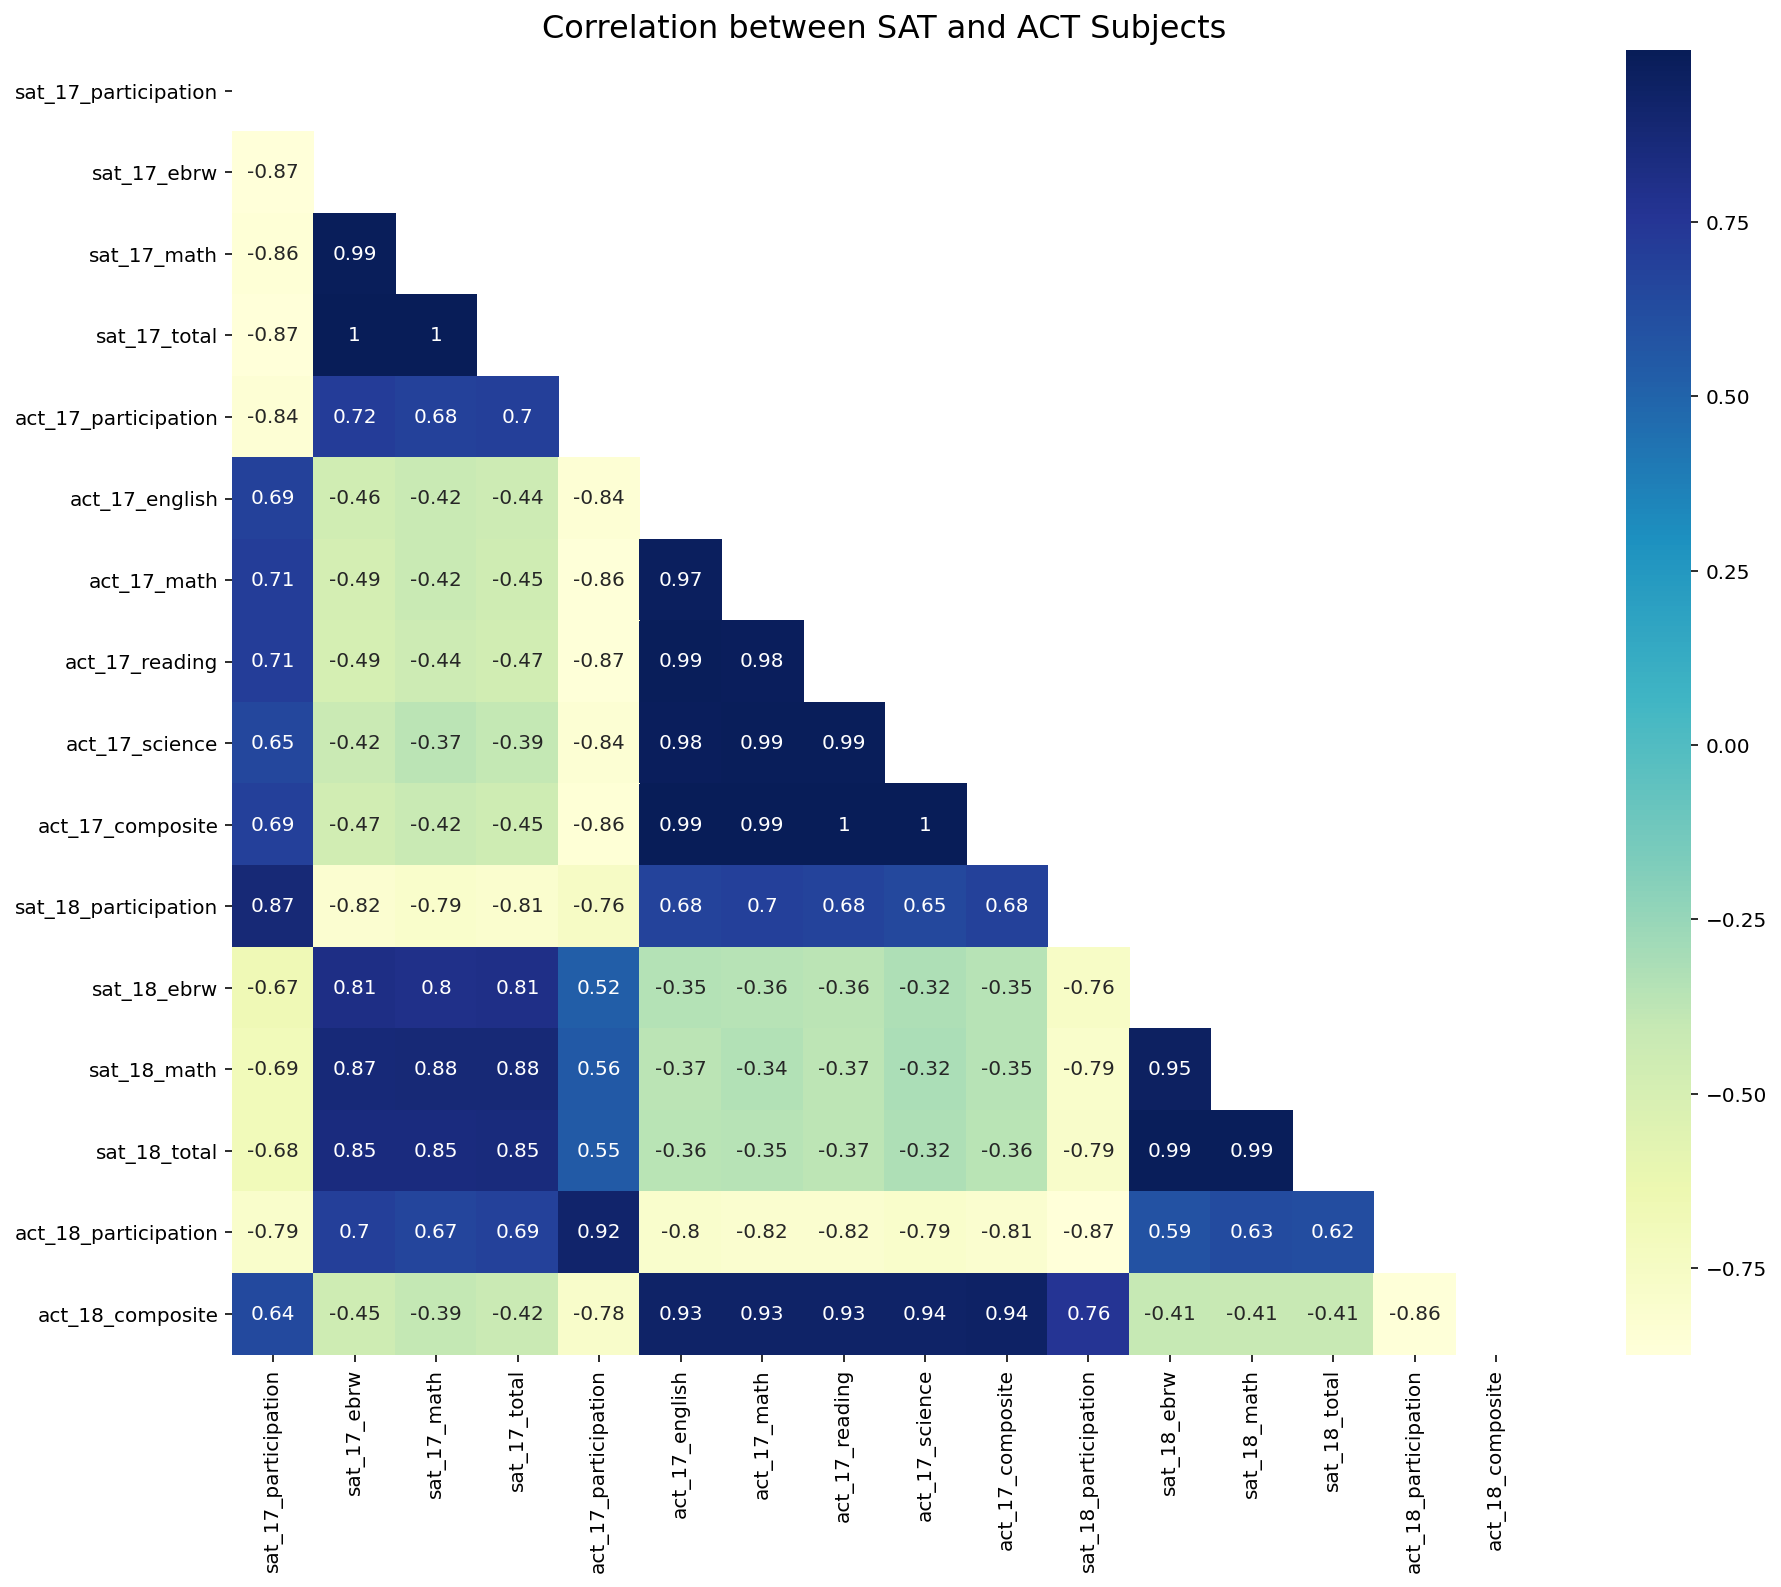

In [105]:
corr = scaled_final.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(16,12))
plt.title('Correlation between SAT and ACT Subjects', fontsize=16)
sns.heatmap(scaled_final.corr(), mask=mask, square=True, cmap="YlGnBu", annot=True)

This section I will just pick out a few of the significant correlations:

1. ACT 2017 participation and SAT 2017 participation are strong negatively correlated (-0.84). Possible reason could be states that participated in one test tends to forgo another. Similarly in 2018 as well (-0.87). 
2. SAT 2017 participation and SAT 2018 participation are strong positively correlated (0.87). States who participate in SAT 2017 tends to participate in 2018 as well. Similary for ACT test, states who take part in ACT in 2017 will also likely take part in 2018 (0.92). 
3. ACT 2017 subjects english, math, reading, science and composite generally negatively correlated to ACT 18 participation. Possible reason could be a drop in participation compared to 2017. On the other hand, ACT 2017 subjects have positve relationship with SAT 2018 participation. This could be because, states who participate in ACT 2017 are switching to SAT in 2018. 
4. SAT 2018 participation and SAT 2018 subjects ebrw (-0.76), math(-0.79), total(-0.79) are generally negatively correlated. This means higher participation leads to lower score, vice versa, lower participation leads to higher score. 



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [106]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [107]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, ylabel, xlabel, figtitle):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(25, 25))   # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color="turquoise") # feel free to add more settings
        # Set titles, labels, etc here for each subplot
    
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=14)
        ax[i].set_ylabel(ylabel, fontsize=12)
        ax[i].set_xlabel(xlabel, fontsize=12)
        fig.suptitle(figtitle, size=16)

In [108]:
participate_col = ['sat_17_participation', 
                   'act_17_participation', 
                   'sat_18_participation', 
                   'act_18_participation']
titles = ['SAT 2017 Participation',
         'ACT 2017 Participation',
         'SAT 2018 Participation',
         'ACT 2018 Participation']

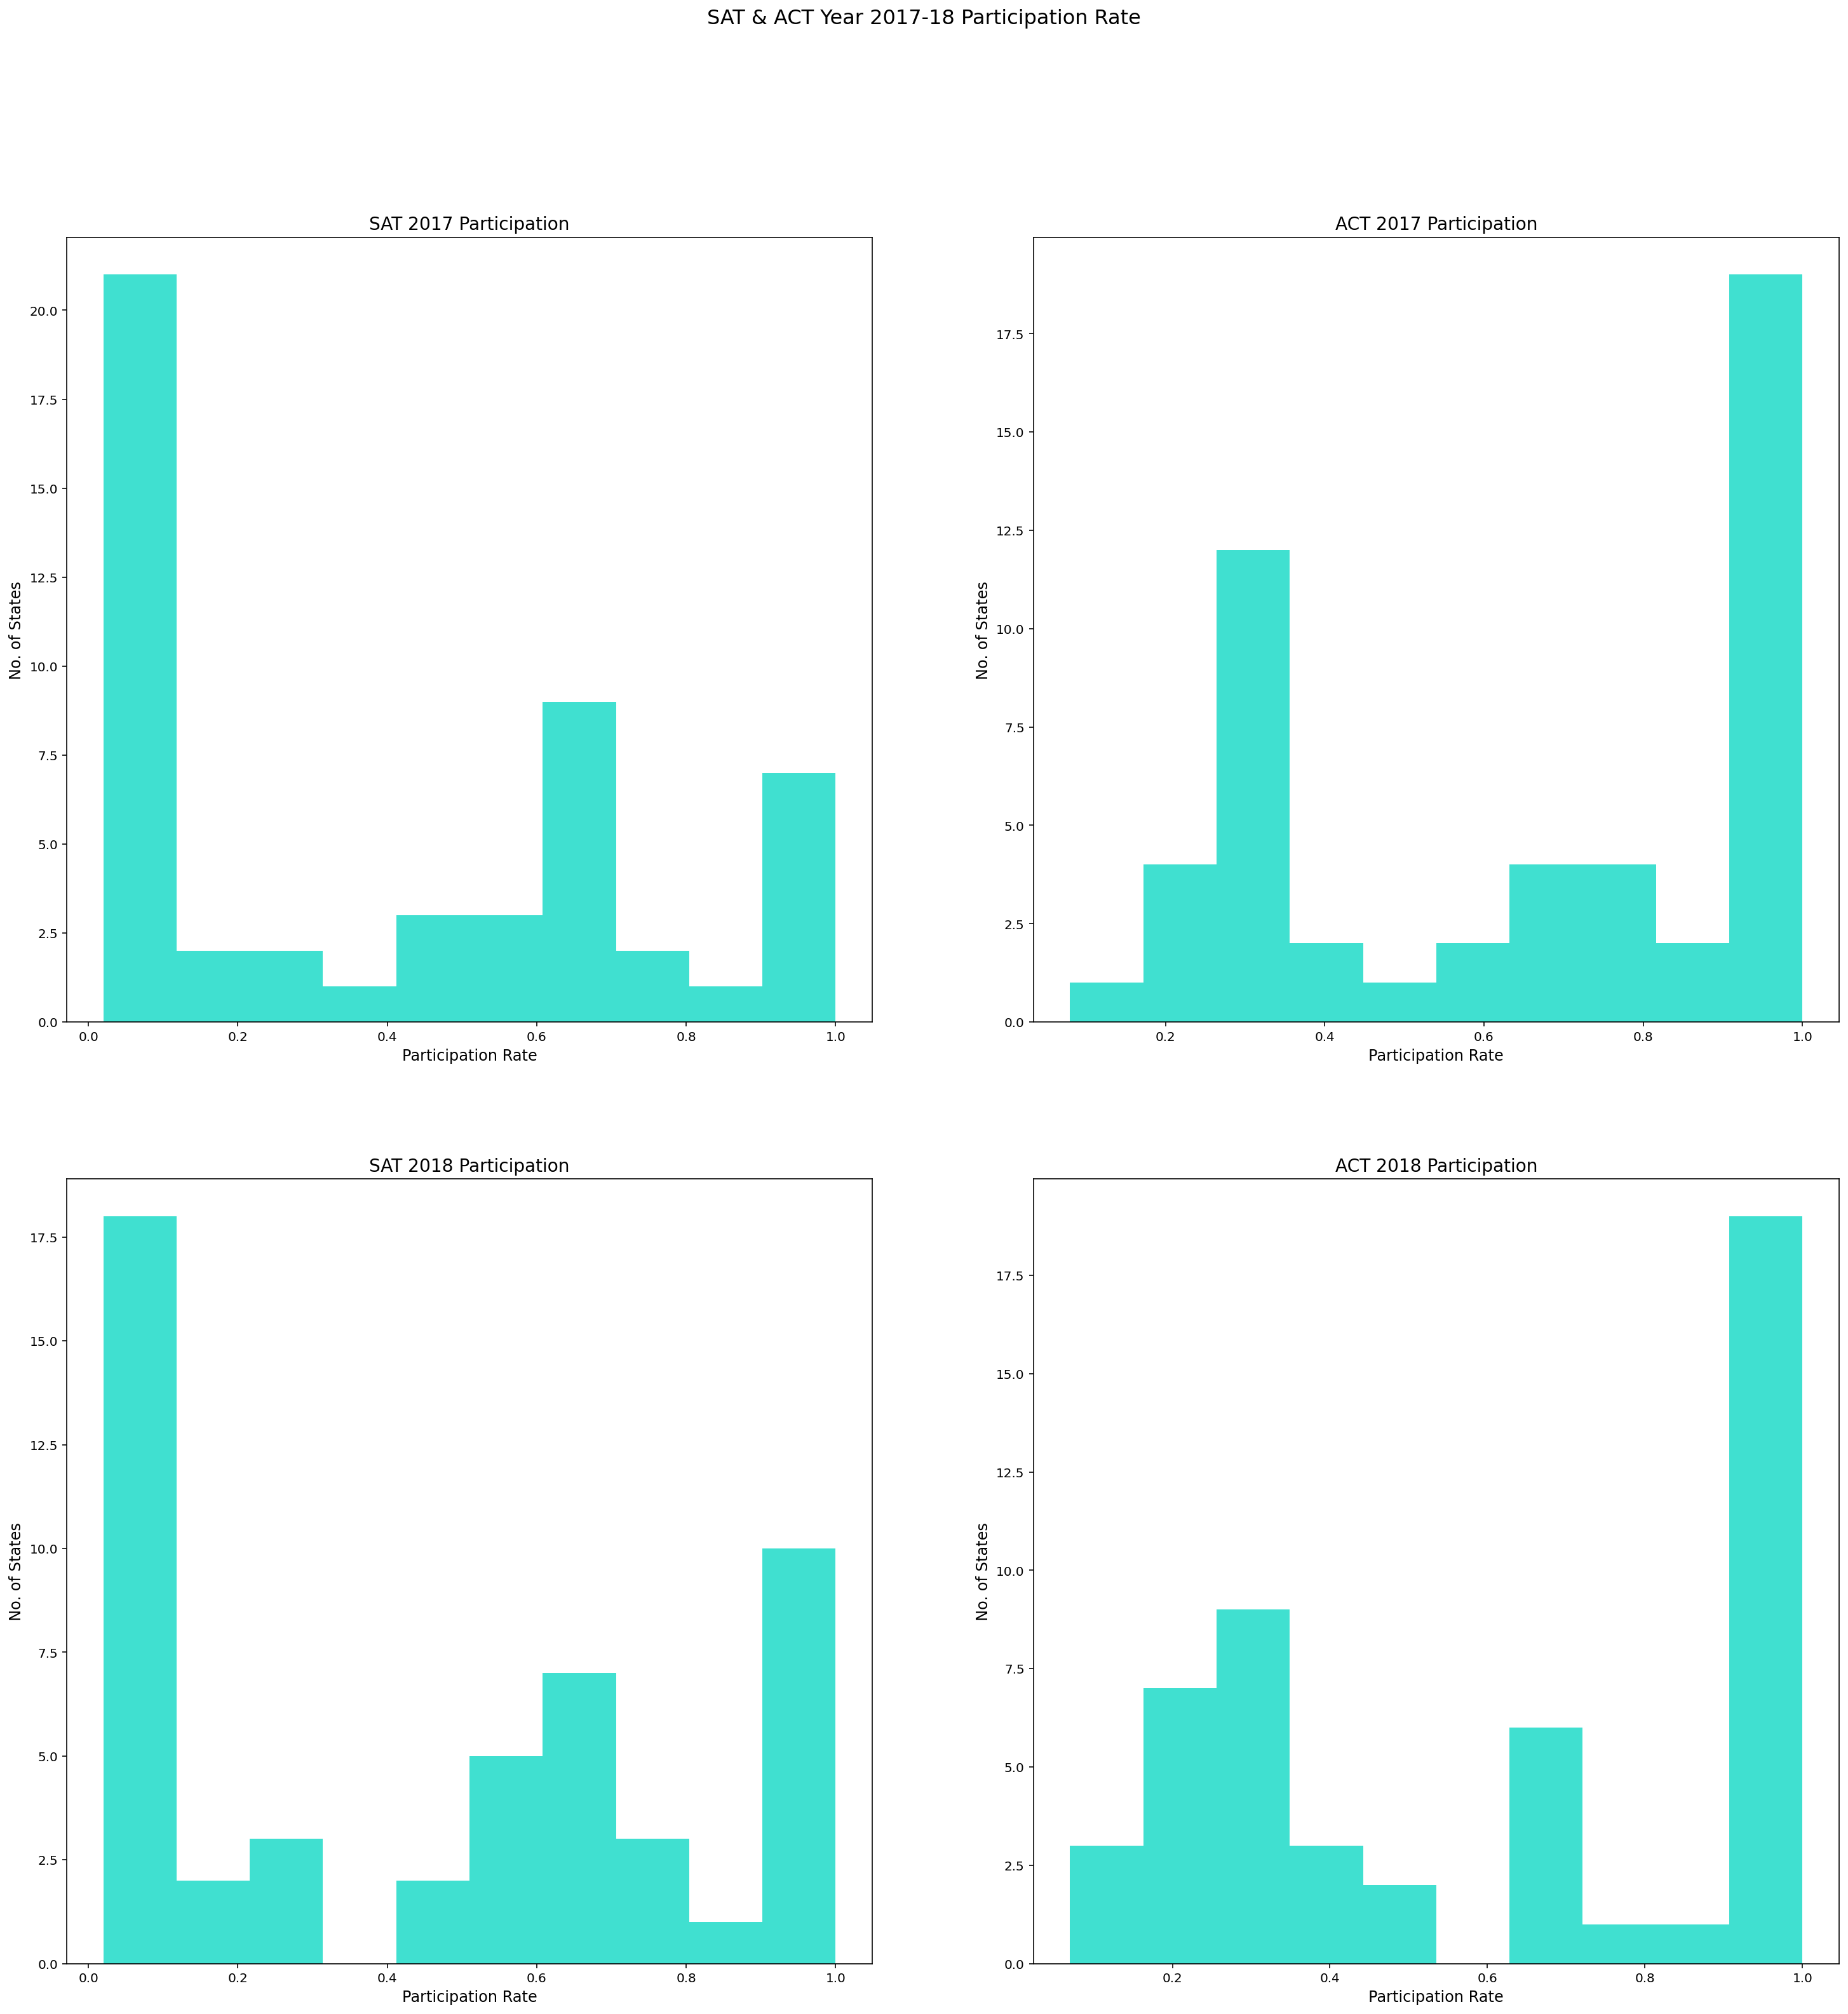

In [109]:
subplot_histograms(final,
                  participate_col,
                  titles,
                  'No. of States',
                  'Participation Rate',
                  'SAT & ACT Year 2017-18 Participation Rate')

SAT 2017 Participation vs ACT 2017 Participation
- There was a high proportion (21) states that had participation rate lower than 10% for SAT 2017. There were only around 7 states that had over 90% participation for SAT 2017. However, ACT 2017 participation rate was much highr, over 18 states that had 90% participation. There was only 2 states that had less than 10% participation rate from ACT 2017. 

SAT 2018 Paricipation vs ACT 2018 Participation
- There were around 18 states that had participation rate lower than 10% for SAT 2018. There were around 10 states that had over 90% participation rate for SAT 2018. On the other hand, only 3 states had participation rate lower than 10% for ACT 2018 while over 18 states had participation rate over 90%. 

SAT 2017 vs SAT 2018
- The number of states that had participation rate lower than 10% decreased from 21 states in 2017 to 18 states in 2018. Participation rate over 90% increased from 7 in 2017 to 10 in 2018. Generally, participation rate for SAT increases from 2017 to 2018. 

ACT 2017 vs ACT 2018
- Generally, the participation rate decreases from 2017 to 2018. The number of states with over 90% participation rate remain at 18 states in 2017 and 2018. However, the number of states with participation rate lower than 10% increased from 2017 to 2018. Besides that, the general shape of the histogram had shifted more towards the left, indicating a lower particiaption rate. 

In [110]:
math_col = ['sat_17_math',
           'act_17_math',
           'sat_18_math']
titles = ['SAT 2017 Math Average Score',
         'ACT 2017 Math Average Score',
         'SAT 2018 Math Average Score']

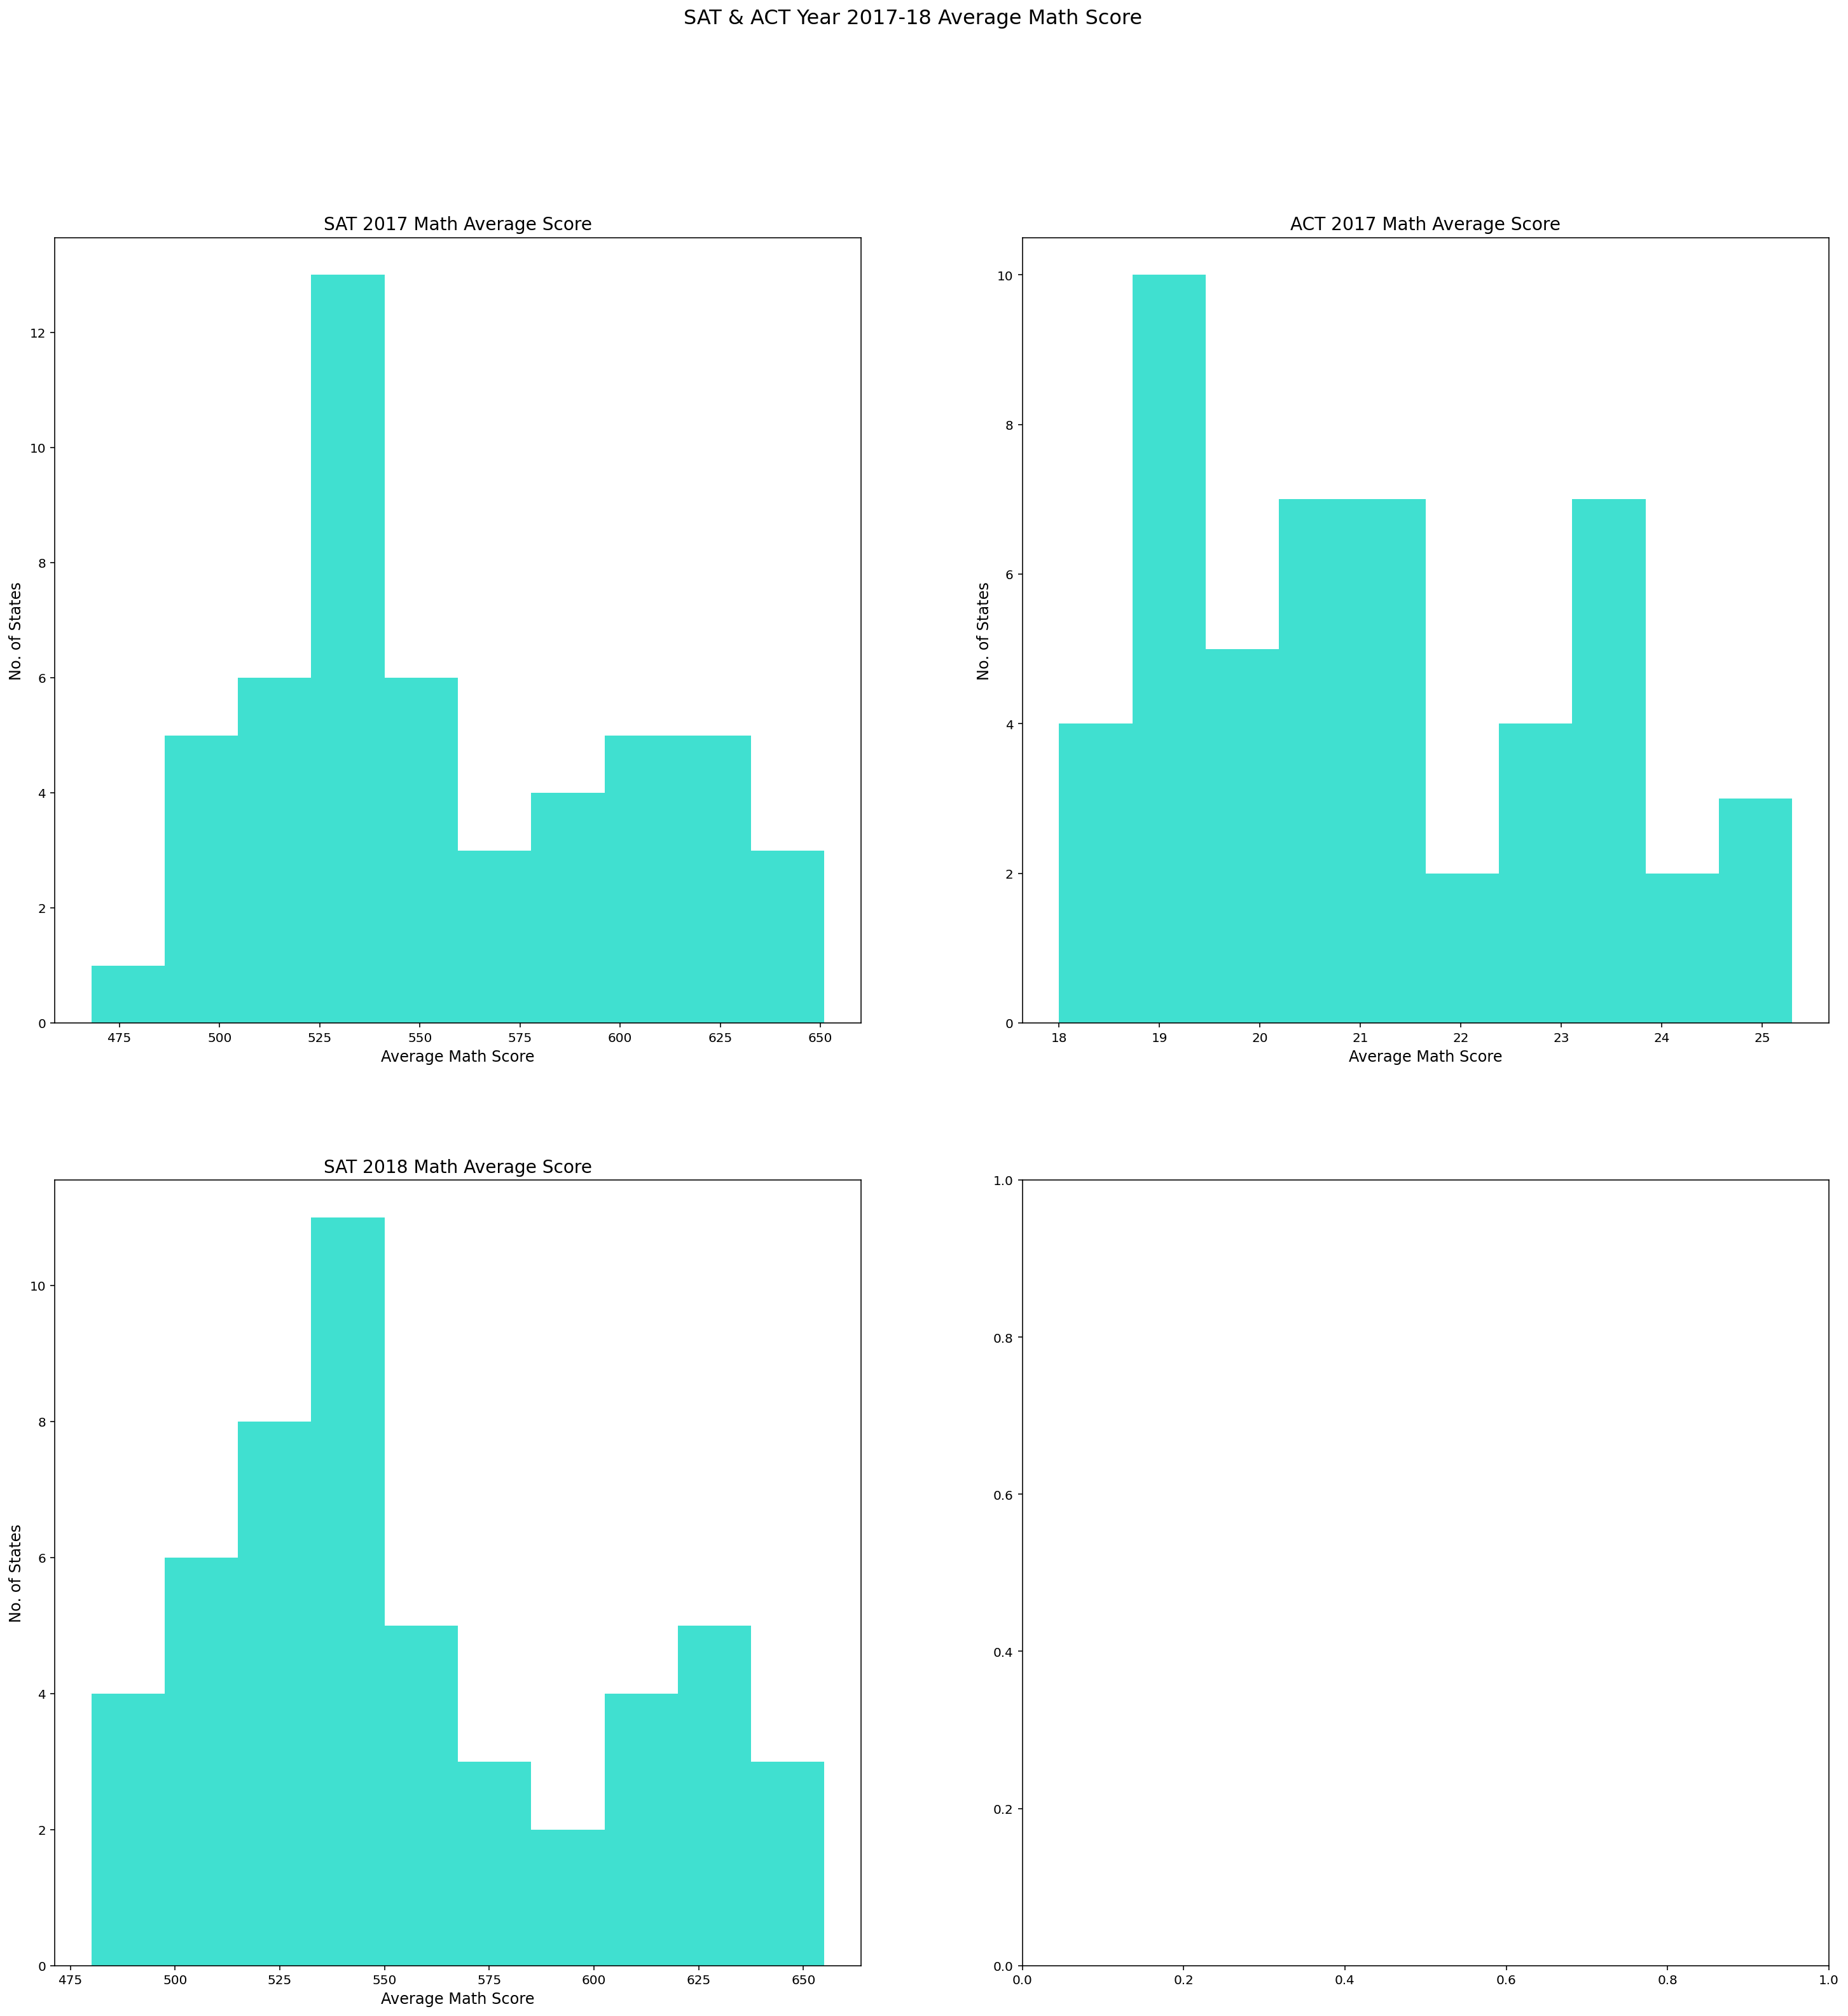

In [111]:
subplot_histograms(final,
                  math_col,
                  titles,
                  'No. of States',
                  'Average Math Score',
                  'SAT & ACT Year 2017-18 Average Math Score')

SAT 2017 Math
- Large proportion (13) of the states tends to fall within the range of 525 for average math score. Only 3 states had a high average math score within the 630-650 range. Generally, math score tends to be in mid-lower range. 

ACT 2017 Math
- 10 states had average math score within the 19 range. 3 states fall within the high average score range of 25. Generally, states score in the mid-lower range of below 22 for math.

SAT 2017 Math vs SAT 2018 Math
- The average math score increased slightly in 2018. The histogram shifted to the right slightly, meaning the average math score are higher. More states are within the middle range of 540. 

In [112]:
reading_col = ['sat_17_ebrw',
              'act_17_reading',
              'sat_18_ebrw']
title = ['SAT 2017 Evidence-Based Reading and Writing Average Score',
        'ACT 2017 Reading Average Score',
        'SAT 2018 Evidence-Based Reading and Writing Average Score']

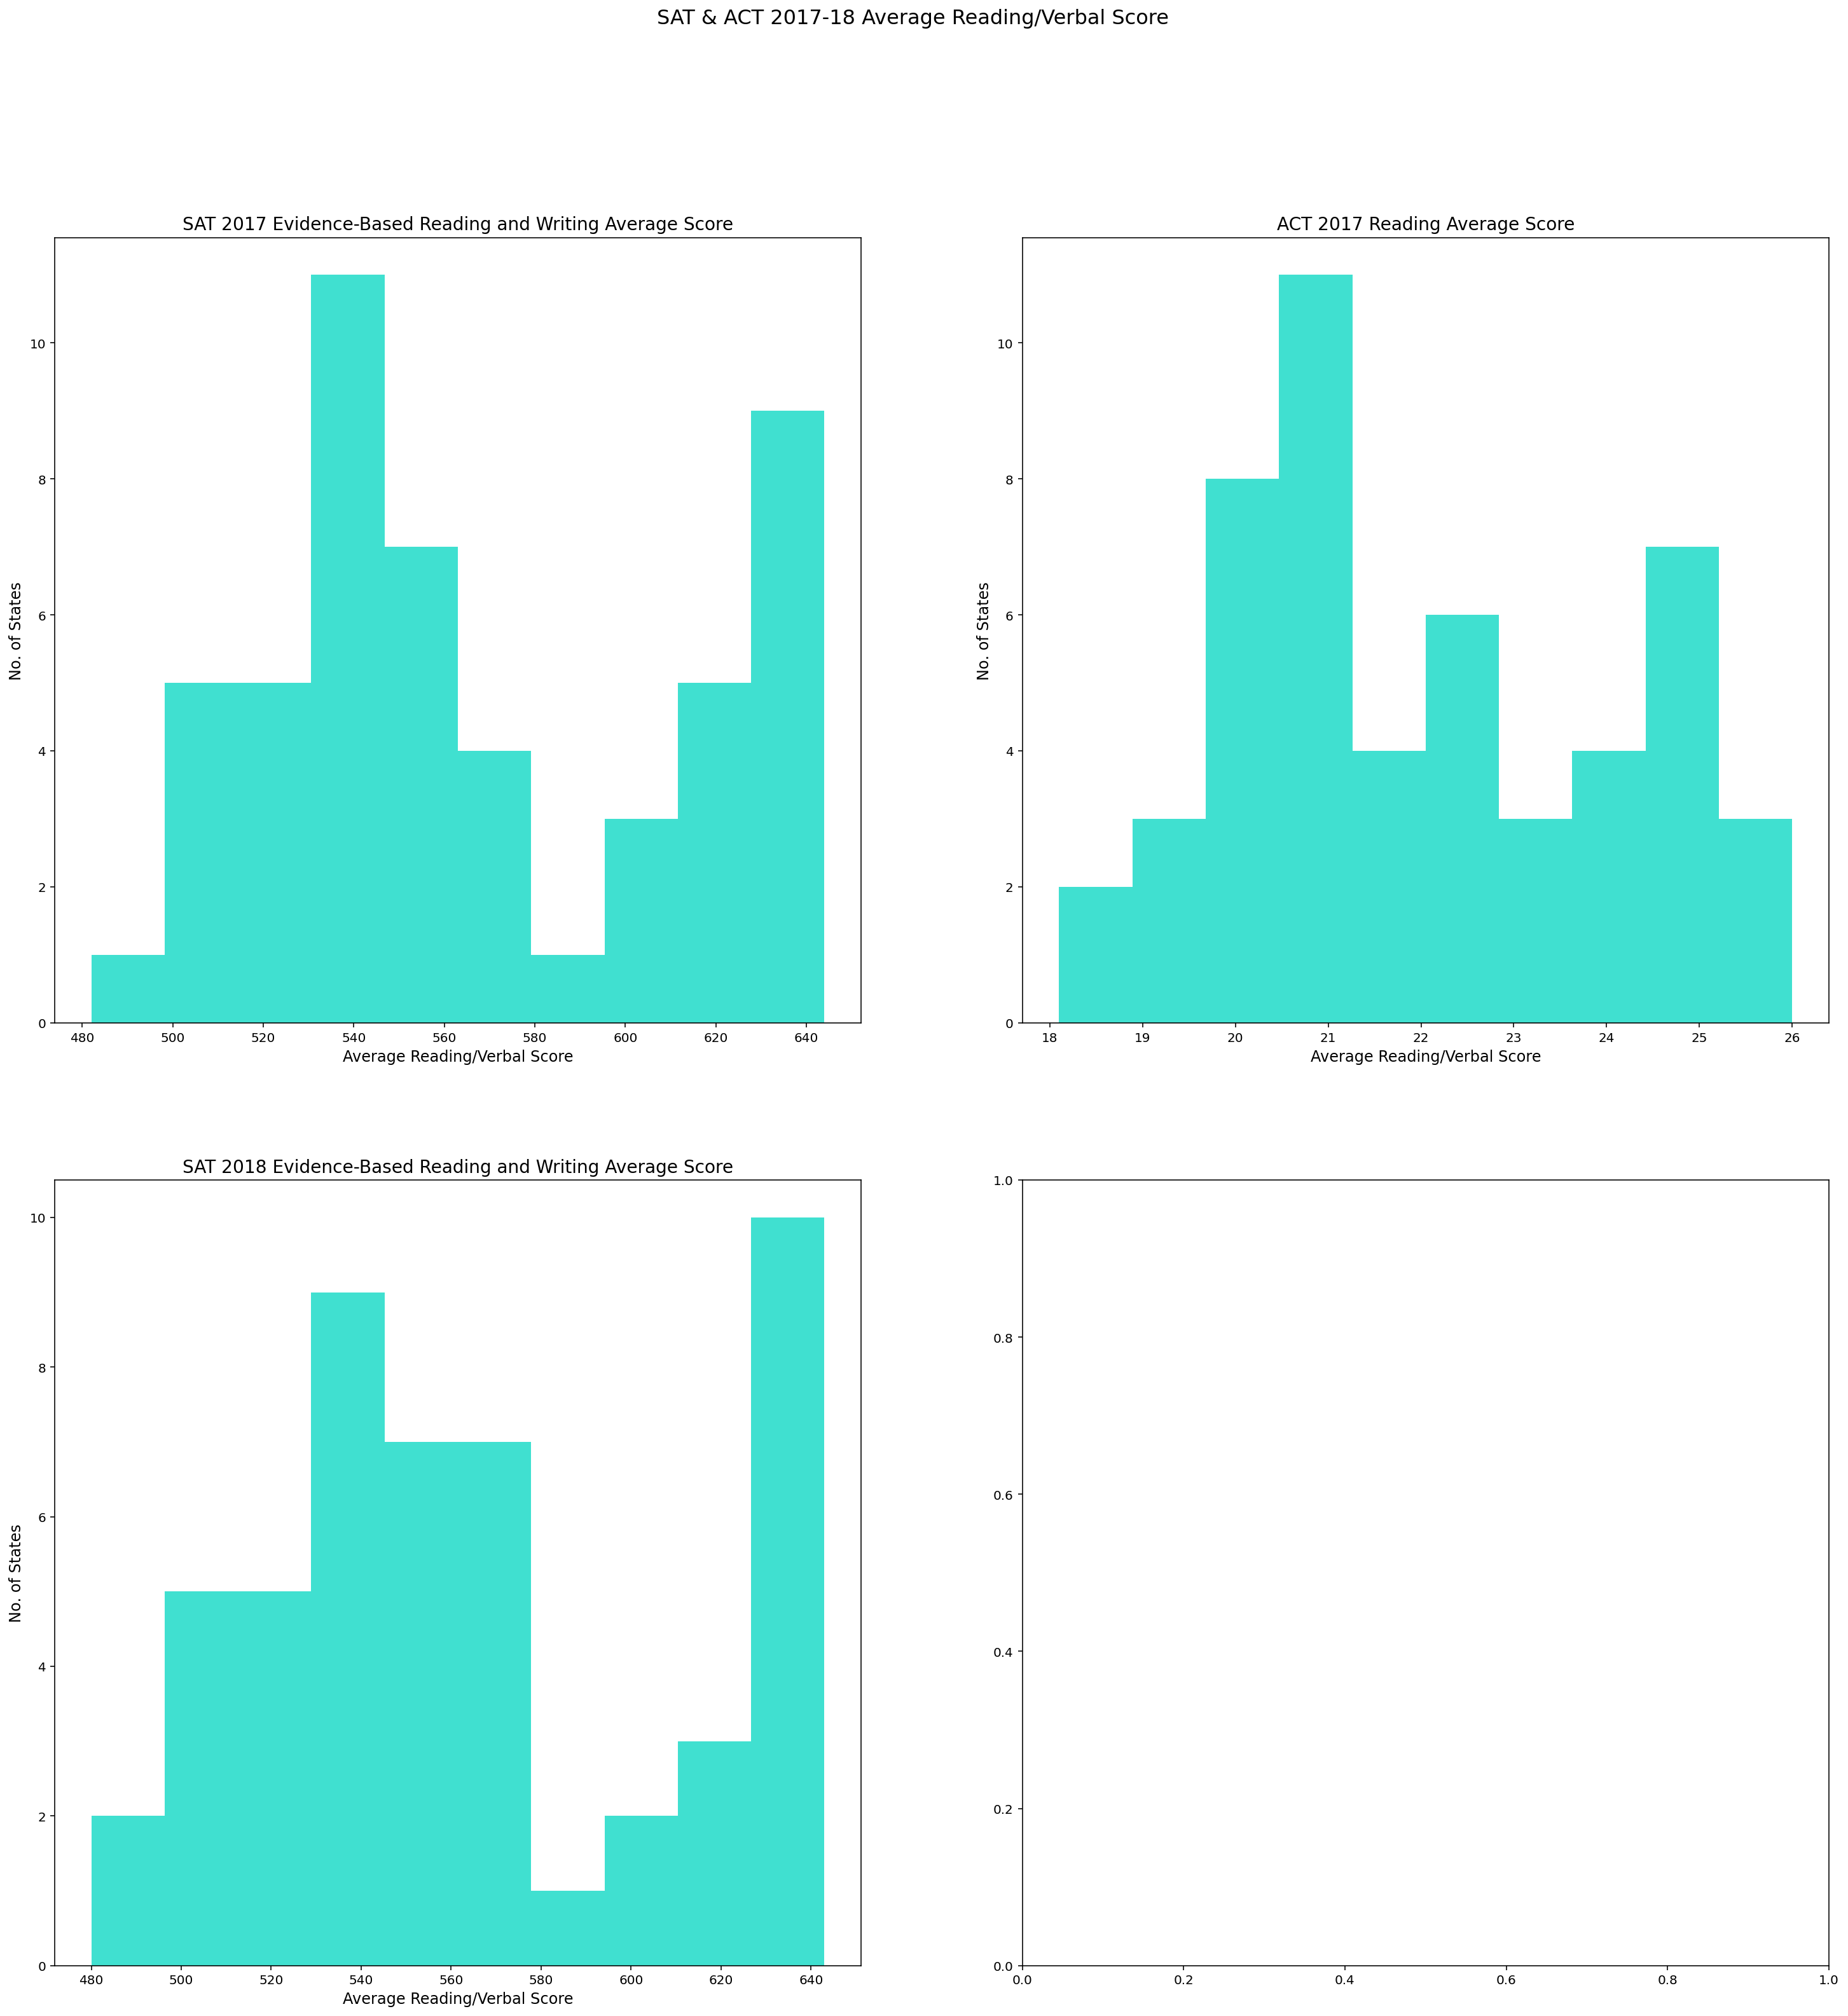

In [113]:
subplot_histograms(final,
                  reading_col,
                  title,
                  'No. of States',
                  'Average Reading/Verbal Score',
                  'SAT & ACT 2017-18 Average Reading/Verbal Score')

SAT 2017 Evidence-based Reading and Writing vs SAT 2018 Evidence-based Reading and Writing
- In 2017, 11 states had average score of 540. This is followed by 9 states scoring between 630-640. Only 1 state had an average score between 480-500. In 2018, there are two states that had an average score between 480-500. The peak was at 630-650 range with 10 states. Generally, there seems to be a slight drop in reading and writing score compare to 2017.

ACT 2017 Reading 
- 11 states had average reading score of 21, followed by 8 states score 20. Generally, the states score somewhere in the mid-lower range of 20-23.  

In [114]:
final_col = ['sat_18_total',
             'act_18_composite', 
             'sat_17_total',
             'act_17_composite']
titles = ['SAT 2018 Total Scores', 
          'ACT 2018 Composite Scores', 
          'SAT 2017 Total Scores', 
          'ACT 2017 Composite Scores']

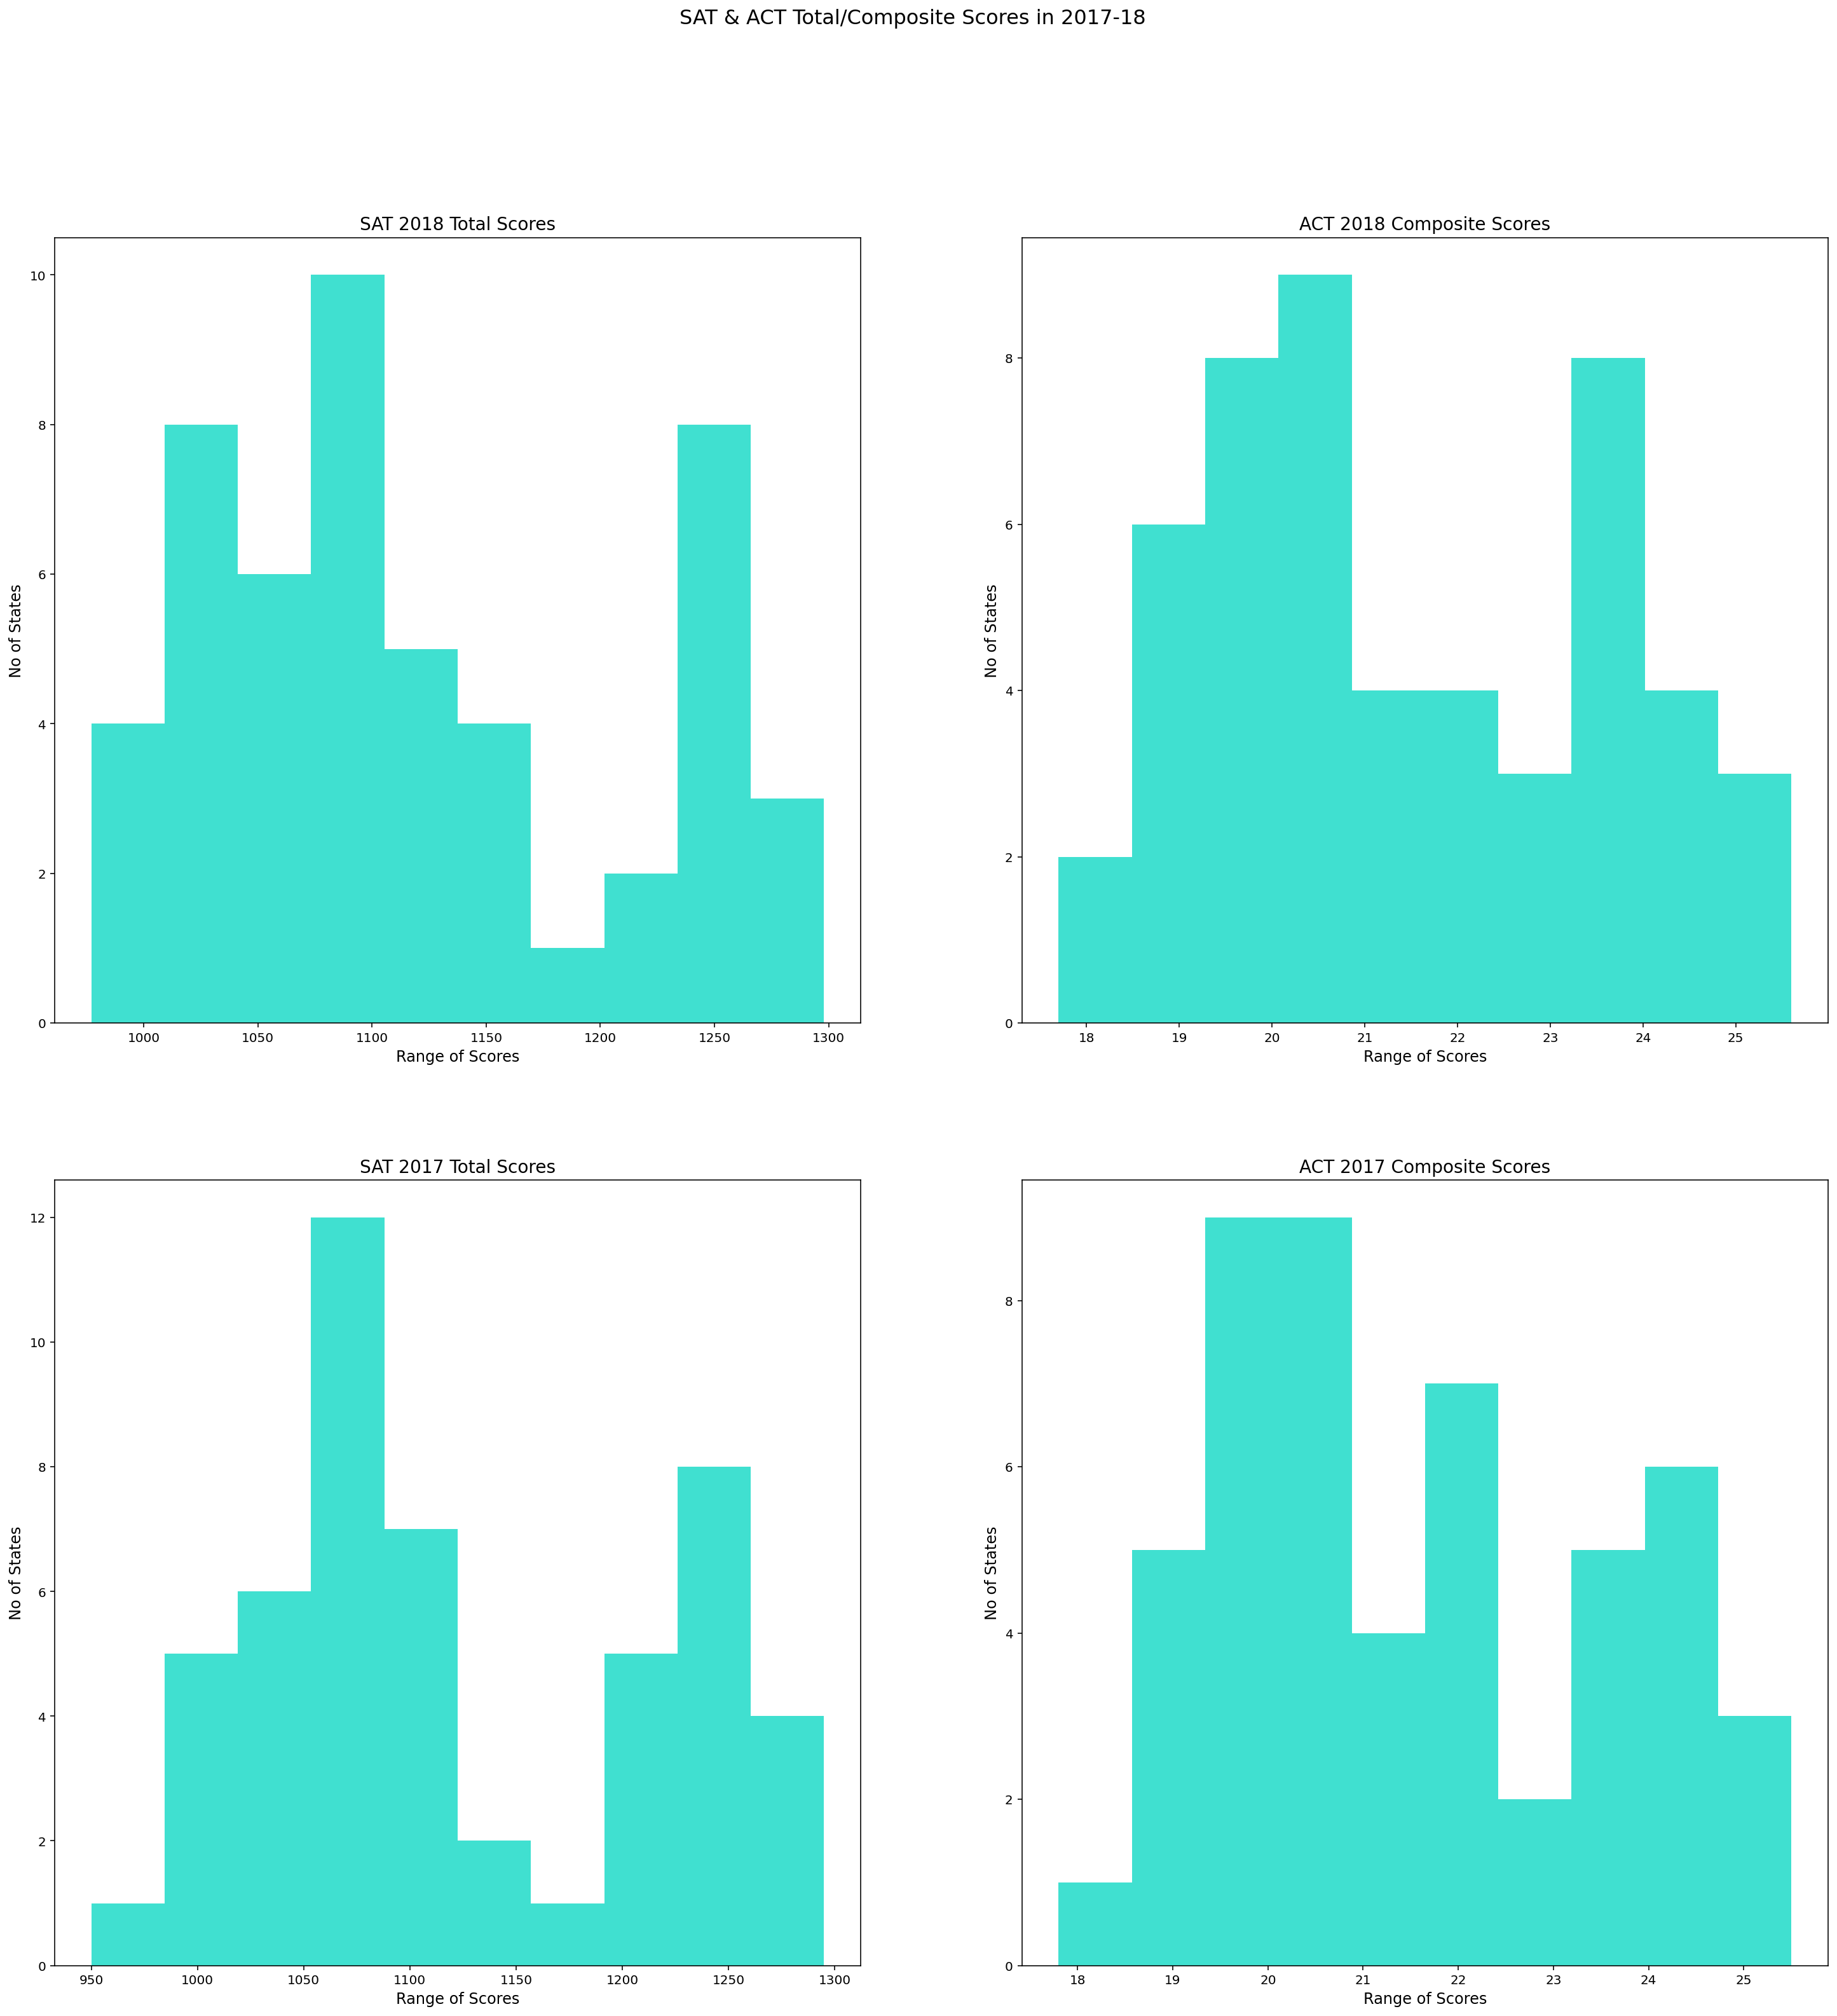

In [115]:
subplot_histograms(final,
                   final_col, 
                   titles, 
                   "No of States",
                   "Range of Scores",
                   "SAT & ACT Total/Composite Scores in 2017-18")

SAT 2017 Total vs SAT 2018 Total
- Generally, 2018 score was lower than 2017. In 2018, the graph shifted slightly to the left, meaing lower average total score compare to 2017. In 2017, the peak was at 1090 but in 2018 the peak was at 1060. Therefore, the average total score is lower in 2018. 

ACT 2017 Total vs ACT 2018 Total
- Generally, 2017 and 2018 score remains similar. For both year, the peak was around 20. The shape of both graphs is similar compare to 2017. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


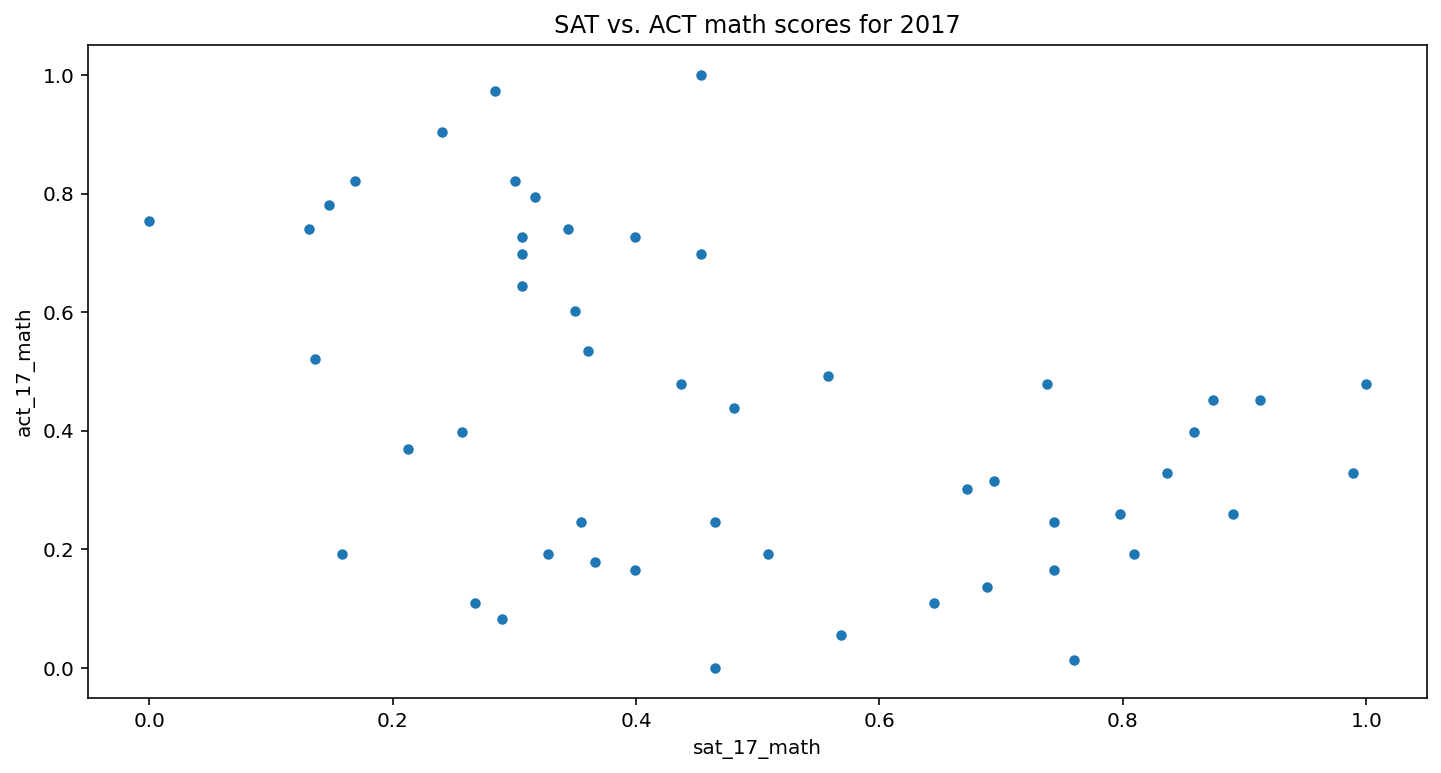

In [116]:
plt.figure(figsize=(12,6))
plt.title('SAT vs. ACT math scores for 2017')
sns.scatterplot(x=scaled_final['sat_17_math'], 
                y=scaled_final['act_17_math'], 
                data=scaled_final, 
                palette= "coolwarm")

SAT vs ACT Math Score for 2017
- There seems to be no (linear) relationship between SAT 2017 math and ACT 2017 math. It seems like a random scatter. 

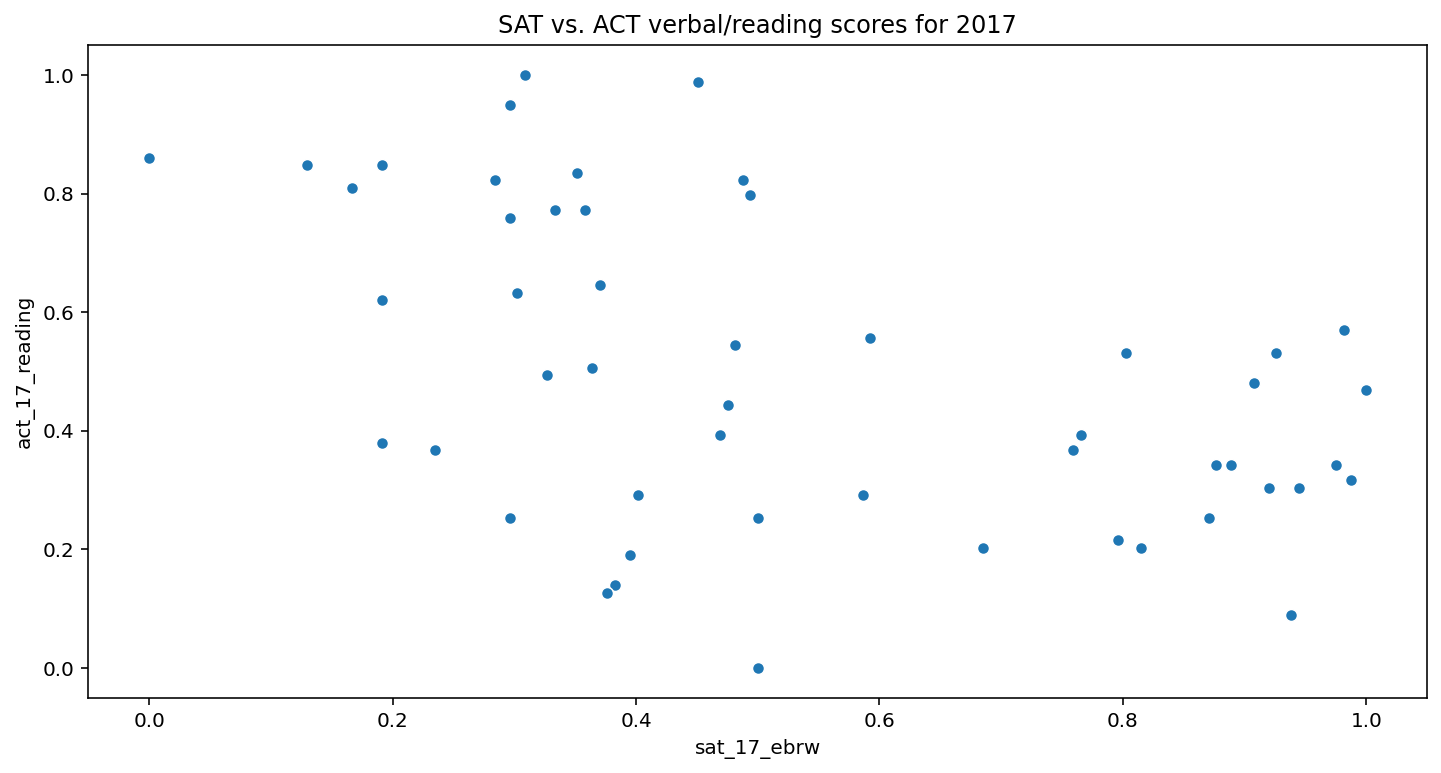

In [117]:
plt.figure(figsize=(12,6))
plt.title('SAT vs. ACT verbal/reading scores for 2017')
sns.scatterplot(x=scaled_final['sat_17_ebrw'], 
                y=scaled_final['act_17_reading'], 
                data=scaled_final, 
                palette= "RdBu_r")

SAT vs ACT verbal/reading scores for 2017
- There seems to be no (linear) relationship between SAT 2017 verbal/reading and ACT 2017 verbal/reading. It seems like a random scatter.

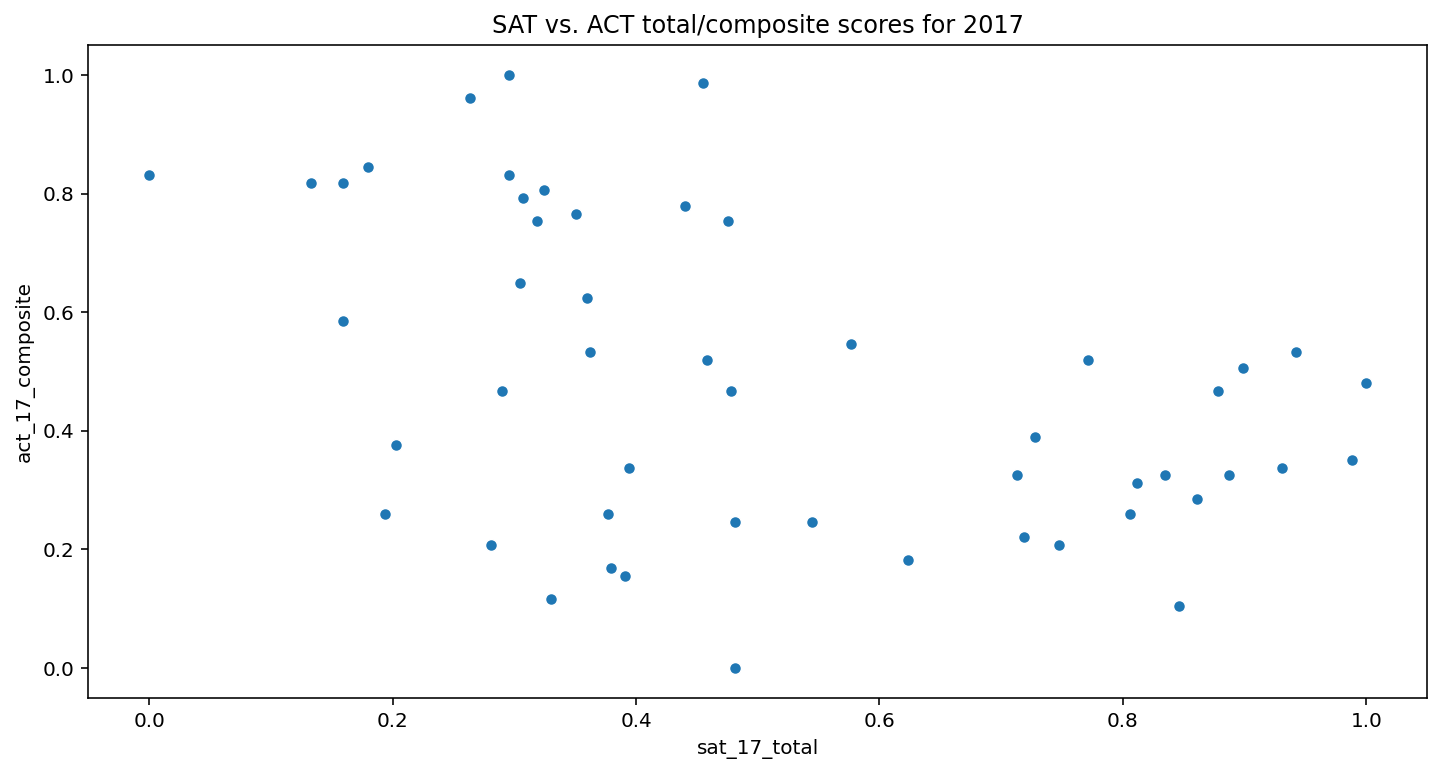

In [118]:
plt.figure(figsize=(12,6))
plt.title('SAT vs. ACT total/composite scores for 2017')
sns.scatterplot(x=scaled_final['sat_17_total'], 
                y=scaled_final['act_17_composite'], 
                data=scaled_final, 
                palette= "coolwarm")

SAT vs ACT composite scores for 2017
- There seems to be no (linear) relationship between SAT 2017 total and ACT 2017 composite. It seems like a random scatter.

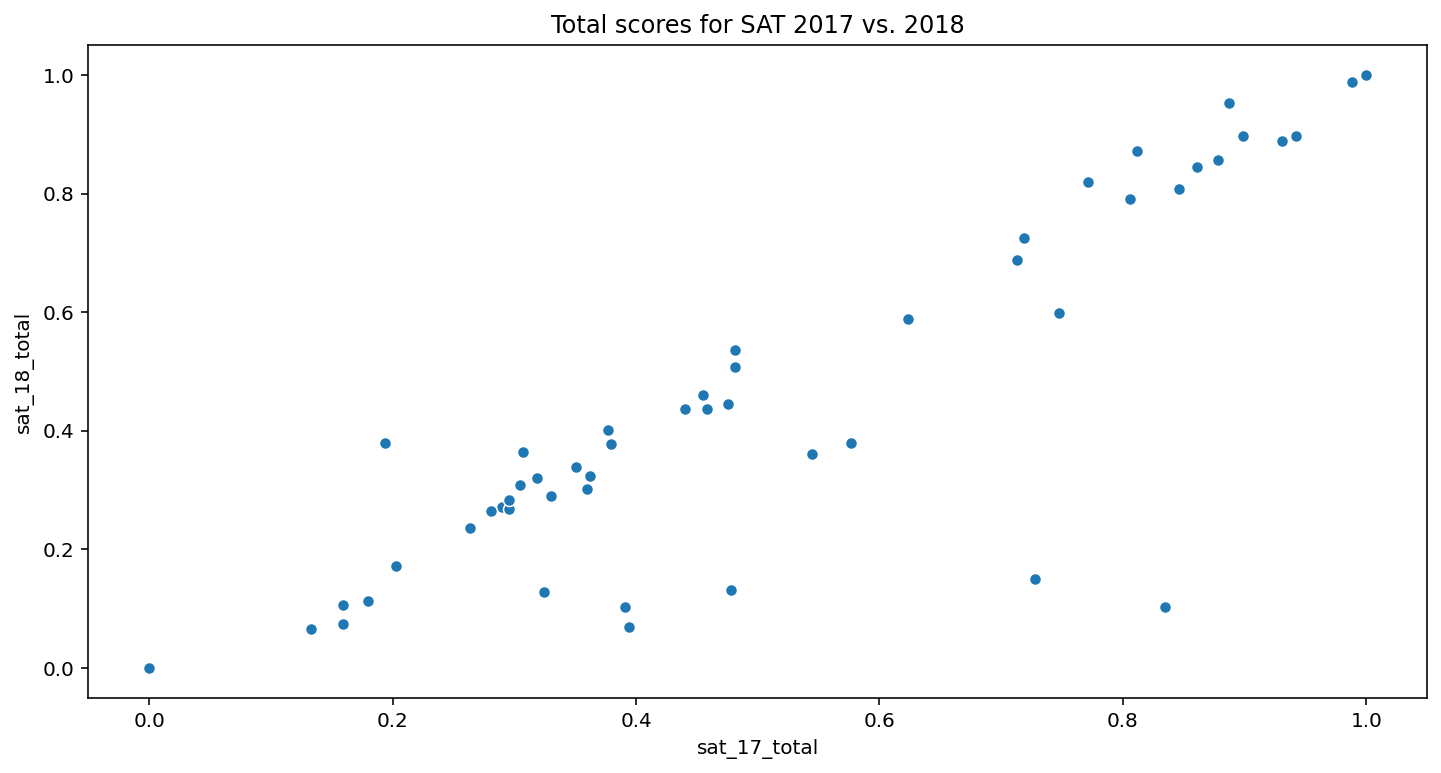

In [119]:
plt.figure(figsize=(12,6))
plt.title('Total scores for SAT 2017 vs. 2018')
sns.scatterplot(x=scaled_final['sat_17_total'], 
                y=scaled_final['sat_18_total'], 
                data=scaled_final, 
                palette= "coolwarm")

Total scores for SAT 2017 vs 2018
- There seems to be a moderate positive linear relationship between SAT 2017 total and SAT 2018 total. States that score well in SAT 2017, generally also scores well in 2018 vice-versa 

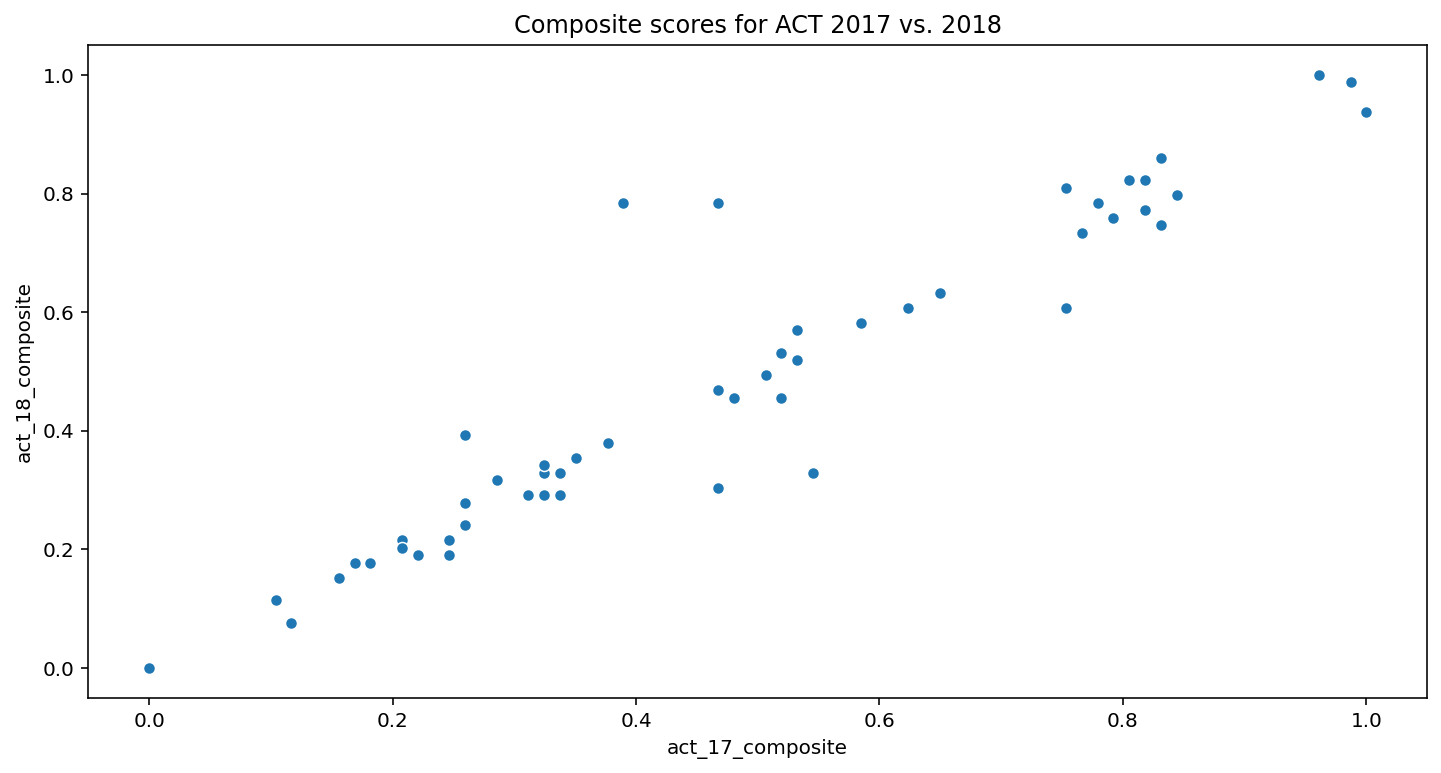

In [120]:
plt.figure(figsize=(12,6))
plt.title('Composite scores for ACT 2017 vs. 2018')
sns.scatterplot(x=scaled_final['act_17_composite'], 
                y=scaled_final['act_18_composite'], 
                data=scaled_final, 
                palette= "coolwarm")

Composite scores for ACT 2017 vs 2018
- There seems to be a moderate positive linear relationship between ACT 2017 composite and ACT 2018 composite. States that score well in SAT 2017, generally also scores well in 2018 vice-versa.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'ACT 2018 Participation')]

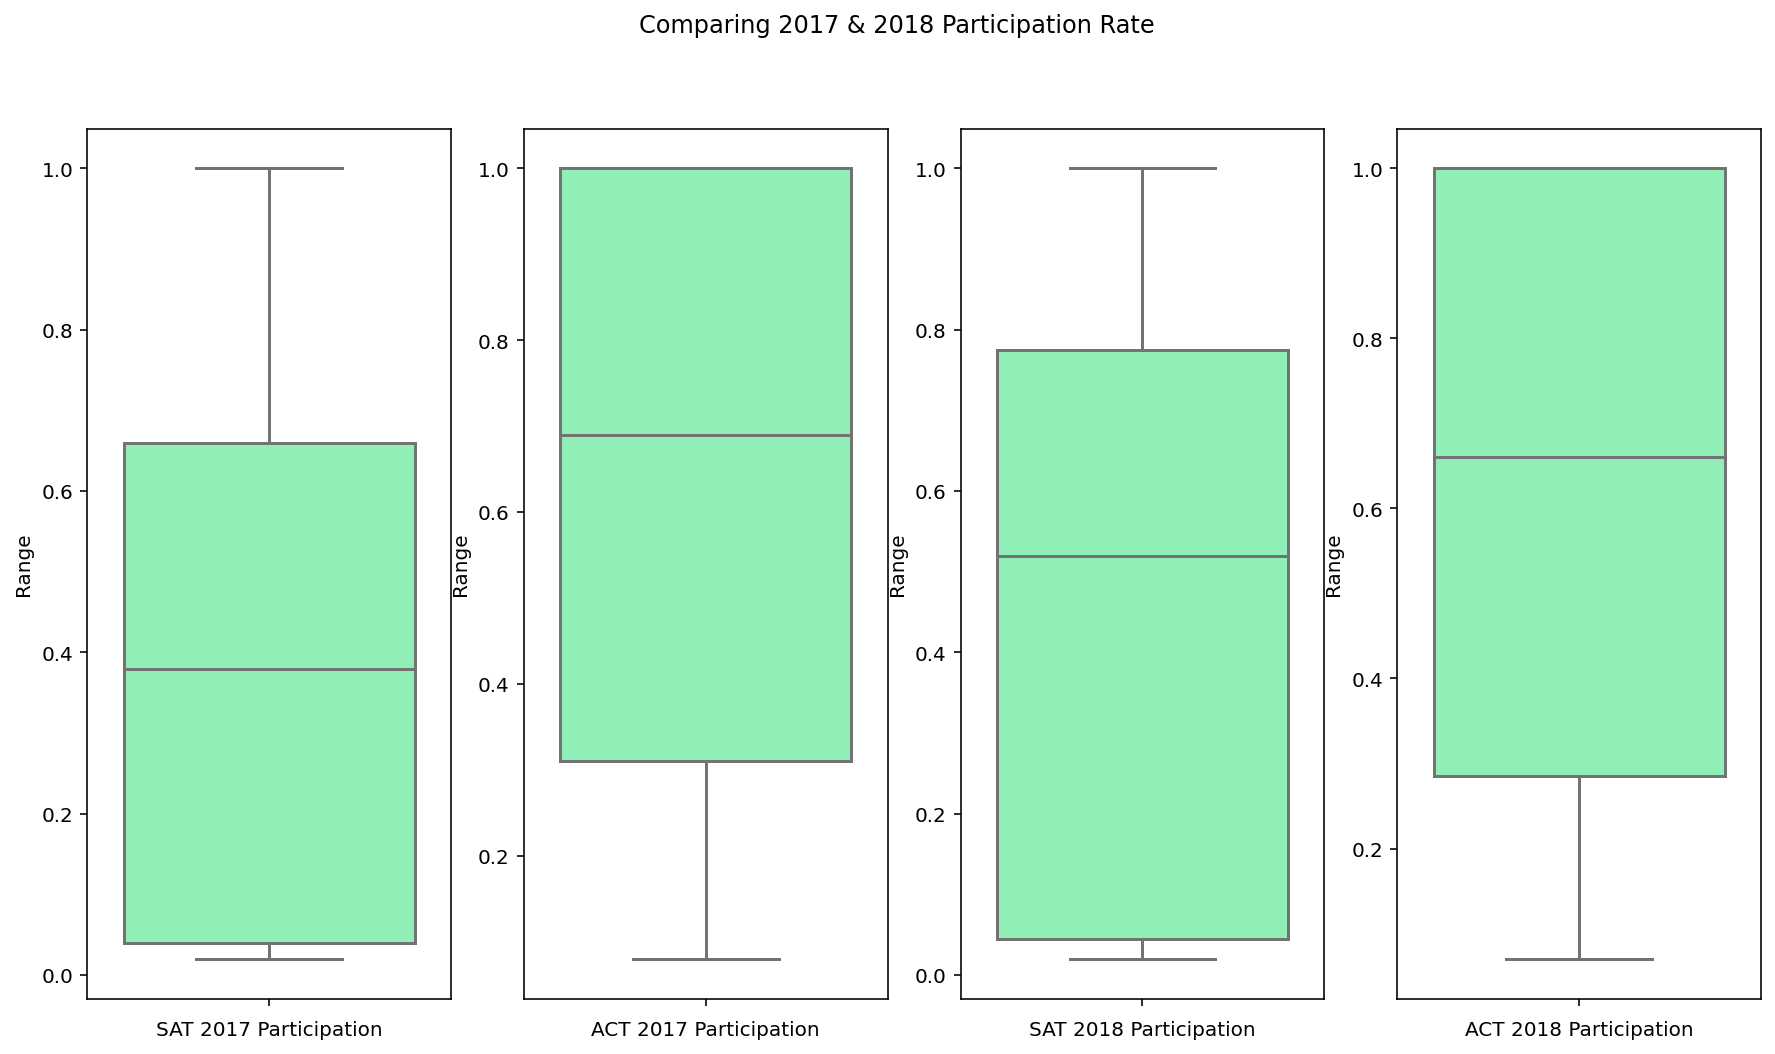

In [146]:
f, axes = plt.subplots(1,4, figsize=(15,8))

f.suptitle('Comparing 2017 & 2018 Participation Rate')

sns.boxplot(final['sat_17_participation'], palette='rainbow', orient='v', ax=axes[0]).set(xlabel='SAT 2017 Participation',
                                                                             ylabel='Range')
sns.boxplot(final['act_17_participation'], palette='rainbow', orient='v', ax=axes[1]).set(xlabel='ACT 2017 Participation',
                                                                             ylabel='Range')
sns.boxplot(final['sat_18_participation'], palette='rainbow', orient='v', ax=axes[2]).set(xlabel='SAT 2018 Participation',
                                                                             ylabel='Range')
sns.boxplot(final['act_18_participation'], palette='rainbow', orient='v', ax=axes[3]).set(xlabel='ACT 2018 Participation',
                                                                             ylabel='Range')

Comparing 2017 SAT & ACT Participation Rate
- ACT has a higher median of 0.7 compared to 0.38 of SAT. Quarter 1(Q1)of SAT was 0.04 compared to 0.31 for ACT. Q3 for SAT was 0.7 compared to 1.0 for ACT. SAT minimum and maximum were 0.02 and 1 respectively. ACT minimum and maximum were 0.08 and 1 respectively. ACT has a higher participation rate compared to SAT.

Comparing 2017 SAT & 2018 SAT Paricipation Rate
- There was a drastic increase in participation rate from 2017 to 2018. The median increased from 0.38 in 2017 to 0.52 in 2018. Q3 also increased from 0.66 in 2017 to 0.78 in 2018. 

Comparing 2018 SAT Participation & 2018 ACT Participation
- ACT still has higher participation compared to SAT. The median of ACT was 0.66 while SAT was 0.52. ACT also has a higher Q3 and Q1 which was 1 and 0.29 respectively. While SAT Q3 and Q1 were lower which was 0.78 and 0.045 respectively. 

Comparing 2017 ACT & 2018 ACT Participation
- There was a drop in participation from 2017 to 2018. The median decreased from 0.7 in 2017 to 0.66 in 2018, suggesting a decrease in participation. Q3 in 2018 also shifted down from 0.31 in 2017 to 0.29. 

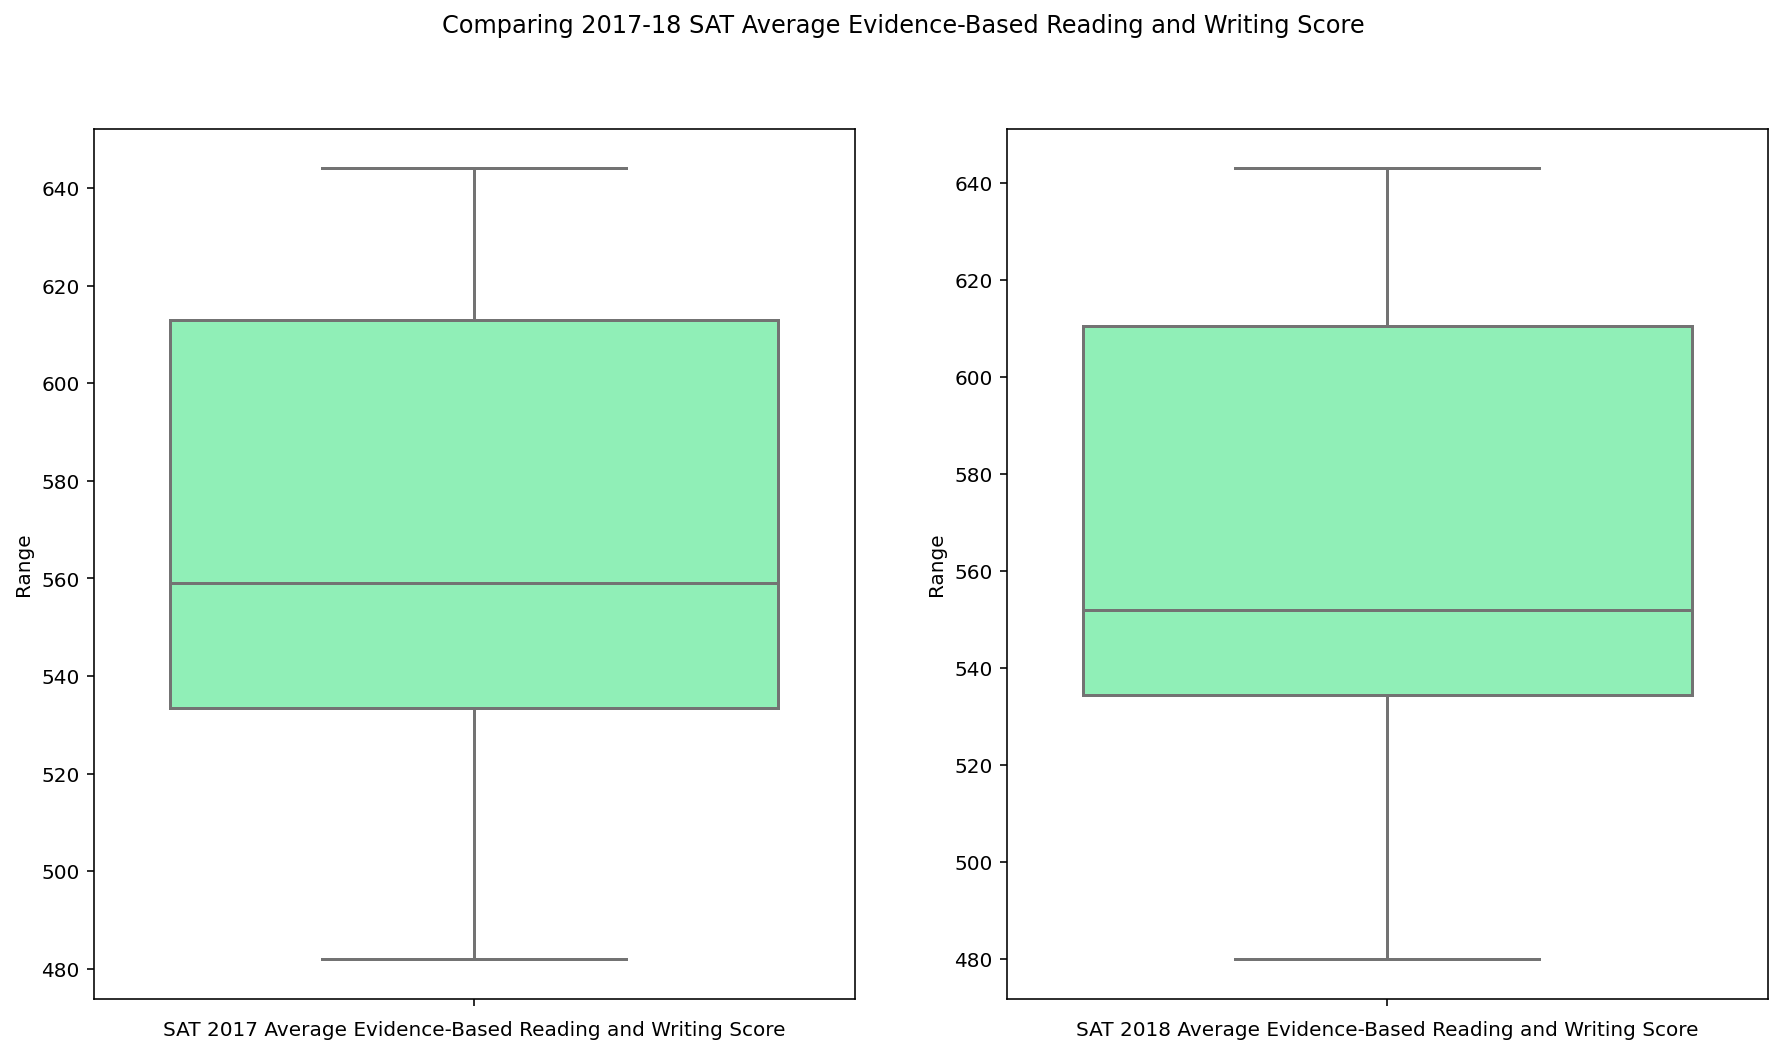

In [122]:
f, axes = plt.subplots(1, 2, figsize=(15,8))

f.suptitle('Comparing 2017-18 SAT Average Evidence-Based Reading and Writing Score')

sns.boxplot(final['sat_17_ebrw'], palette='rainbow', orient='v', ax=axes[0]).set(xlabel='SAT 2017 Average Evidence-Based Reading and Writing Score',
                                                                             ylabel='Range');
sns.boxplot(final['sat_18_ebrw'], palette='rainbow', orient='v', ax=axes[1]).set(xlabel='SAT 2018 Average Evidence-Based Reading and Writing Score',
                                                                             ylabel='Range');

Comparing 2017-18 SAT Average Evidence-Based Reading and Writing (EBRW) Score
- The median of EBRW 2017 was 560 while the median for EBRW 2018 was 550. Q1 and Q3 for both year were around the range of 530 and 610 respectively. Scores for both year looks similar.

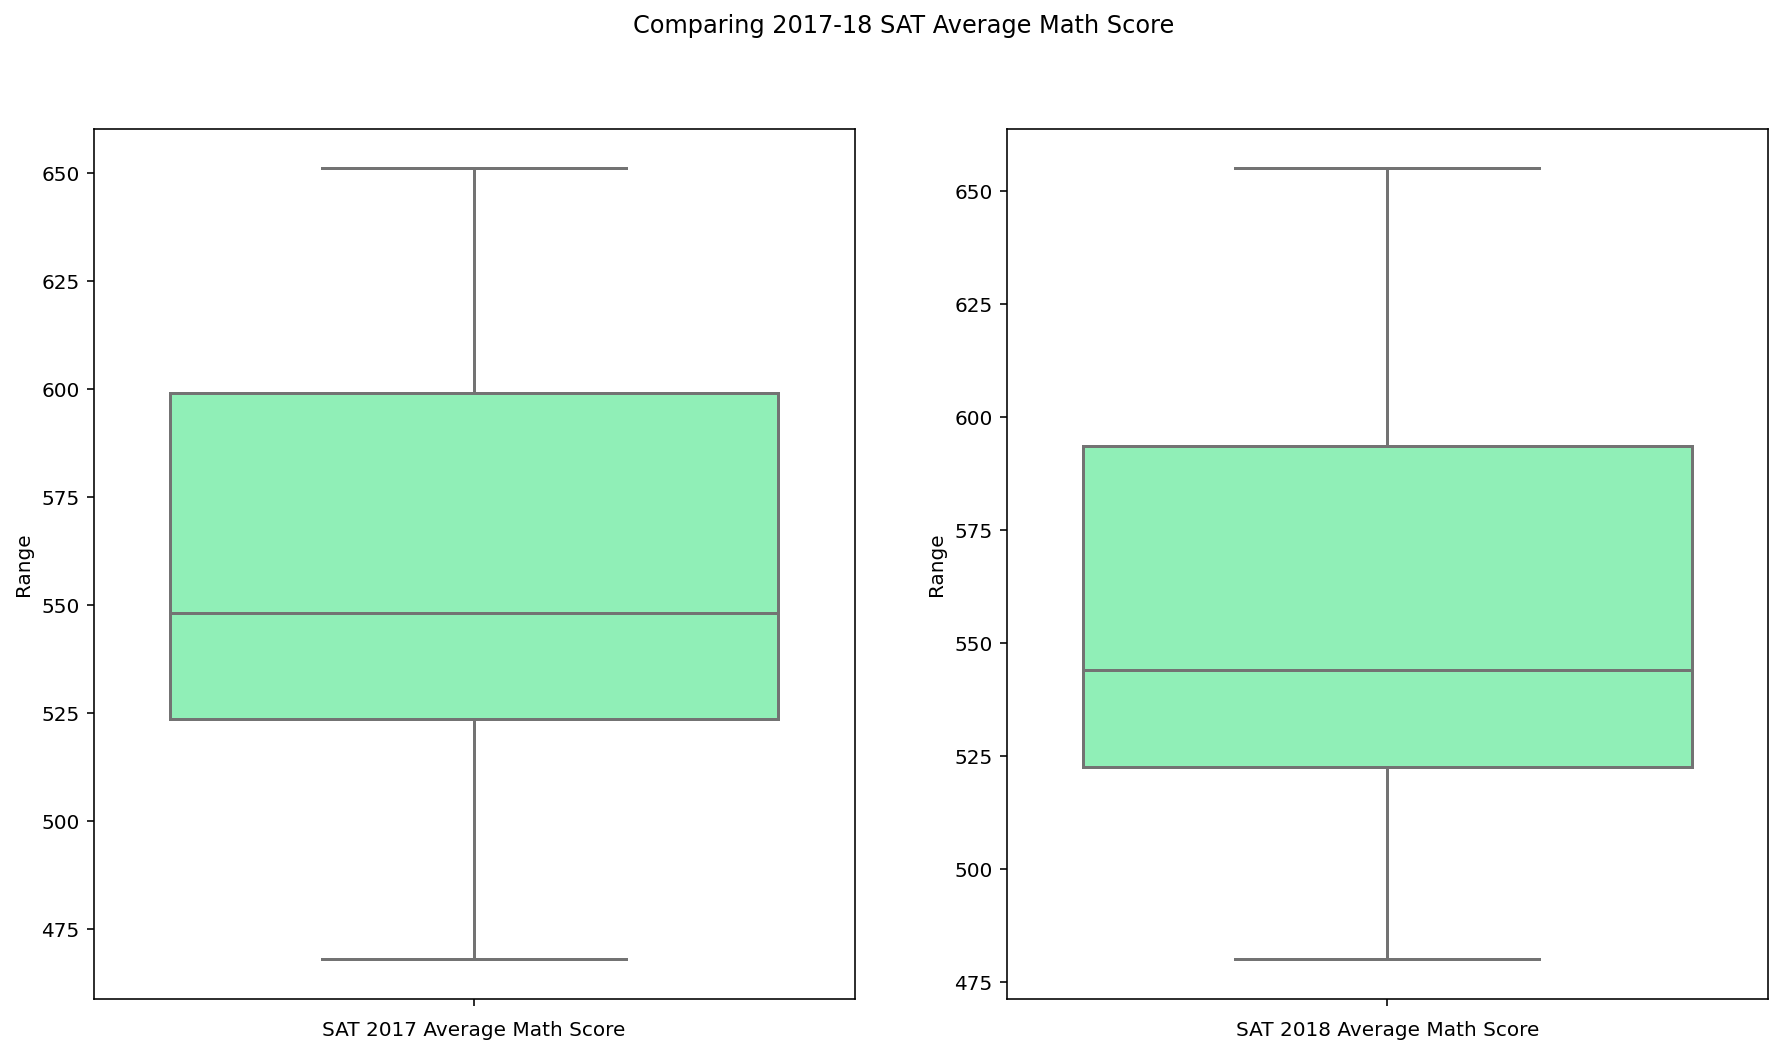

In [123]:
f, axes = plt.subplots(1, 2, figsize=(15,8))

f.suptitle('Comparing 2017-18 SAT Average Math Score')

sns.boxplot(final['sat_17_math'], palette='rainbow', orient='v', ax=axes[0]).set(xlabel='SAT 2017 Average Math Score',
                                                                             ylabel='Range');
sns.boxplot(final['sat_18_math'], palette='rainbow', orient='v', ax=axes[1]).set(xlabel='SAT 2018 Average Math Score',
                                                                             ylabel='Range');

Comparing 2017-18 SAT Average Math Score
- The median for 2017 was around 550, while the median for 2018 was 540. Q1 for 2017 was 525 while 2018 was 522. Q3 for 2017 was 599 while 2018 was 593. Generally math score was lower in 2018. 

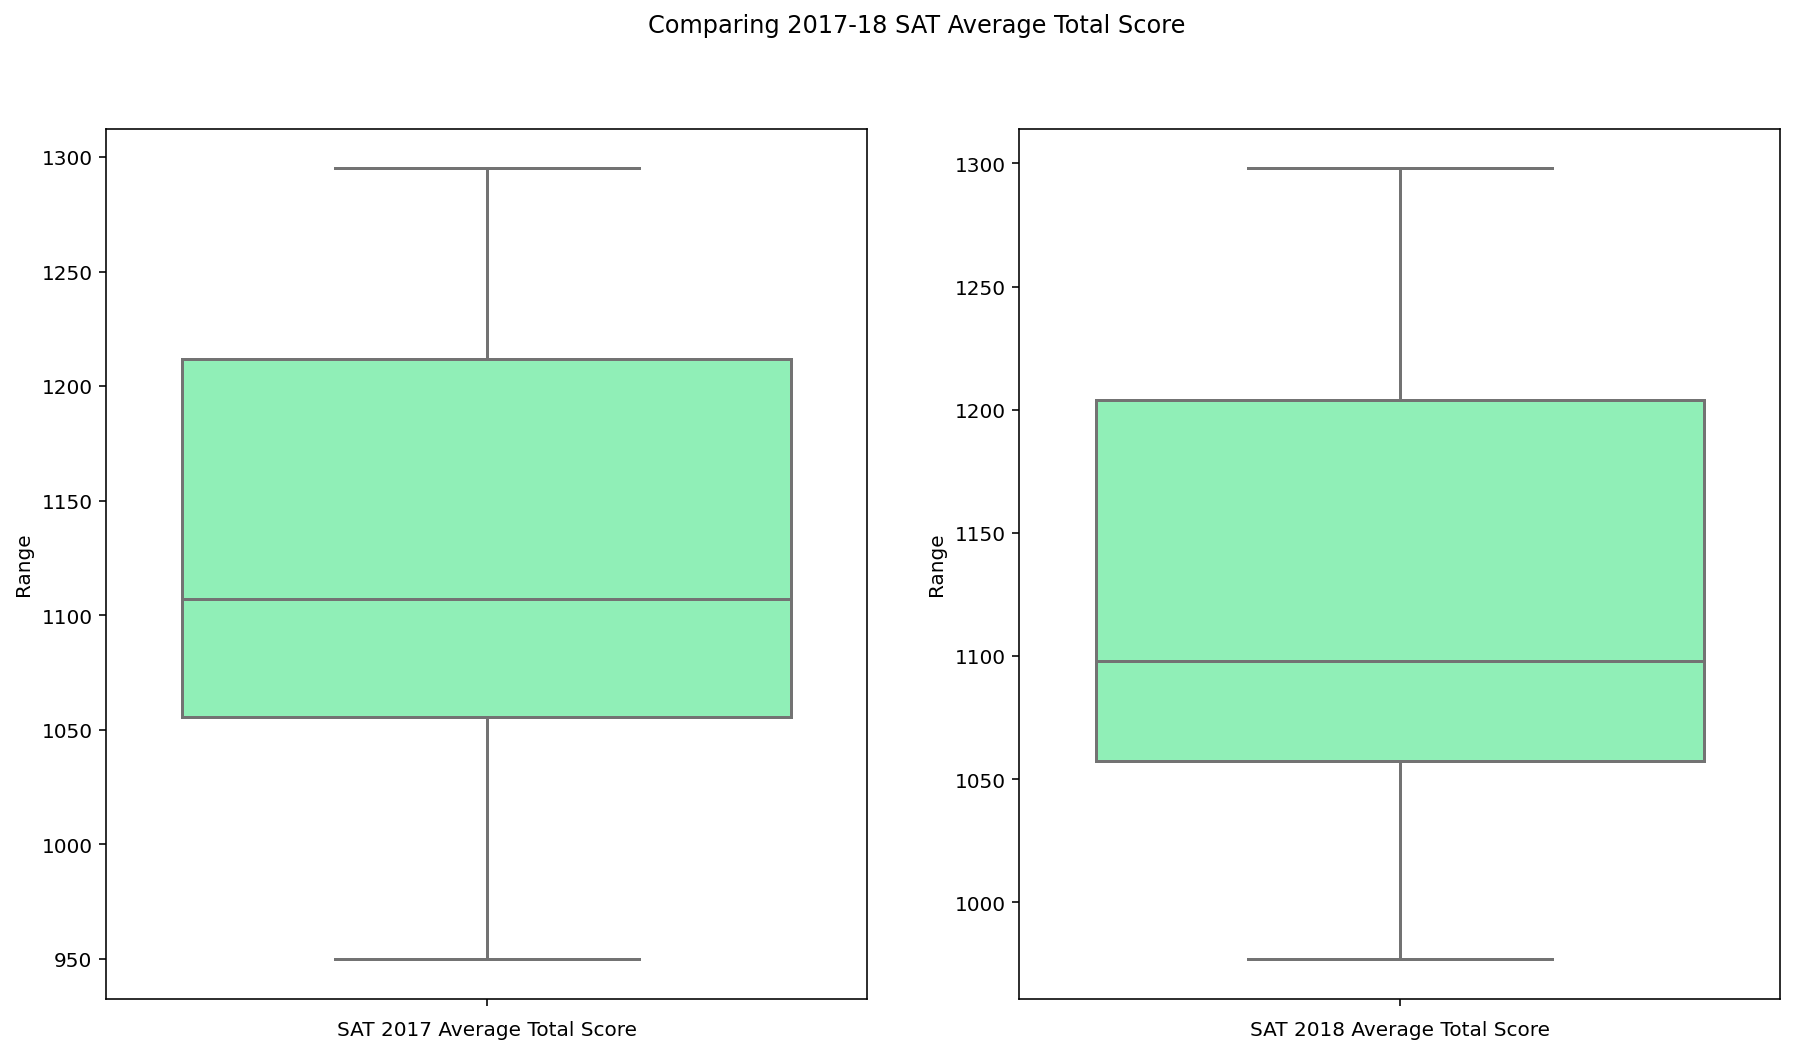

In [124]:
f, axes = plt.subplots(1, 2, figsize=(15,8))

f.suptitle('Comparing 2017-18 SAT Average Total Score')

sns.boxplot(final['sat_17_total'], palette='rainbow', orient='v', ax=axes[0]).set(xlabel='SAT 2017 Average Total Score',
                                                                             ylabel='Range');
sns.boxplot(final['sat_18_total'], palette='rainbow', orient='v', ax=axes[1]).set(xlabel='SAT 2018 Average Total Score',
                                                                             ylabel='Range');

Comparing 2017-18 SAT Average Total Score
- The median for 2017 was 1130 while in 2018 was 1100. Q1 for 2017 was 1055 while 2018 was 1057. Q3 for 2017 was 1212 while 2018 was 1204. It can be observed that generally the average total score for 2018 is lower than 2017. 

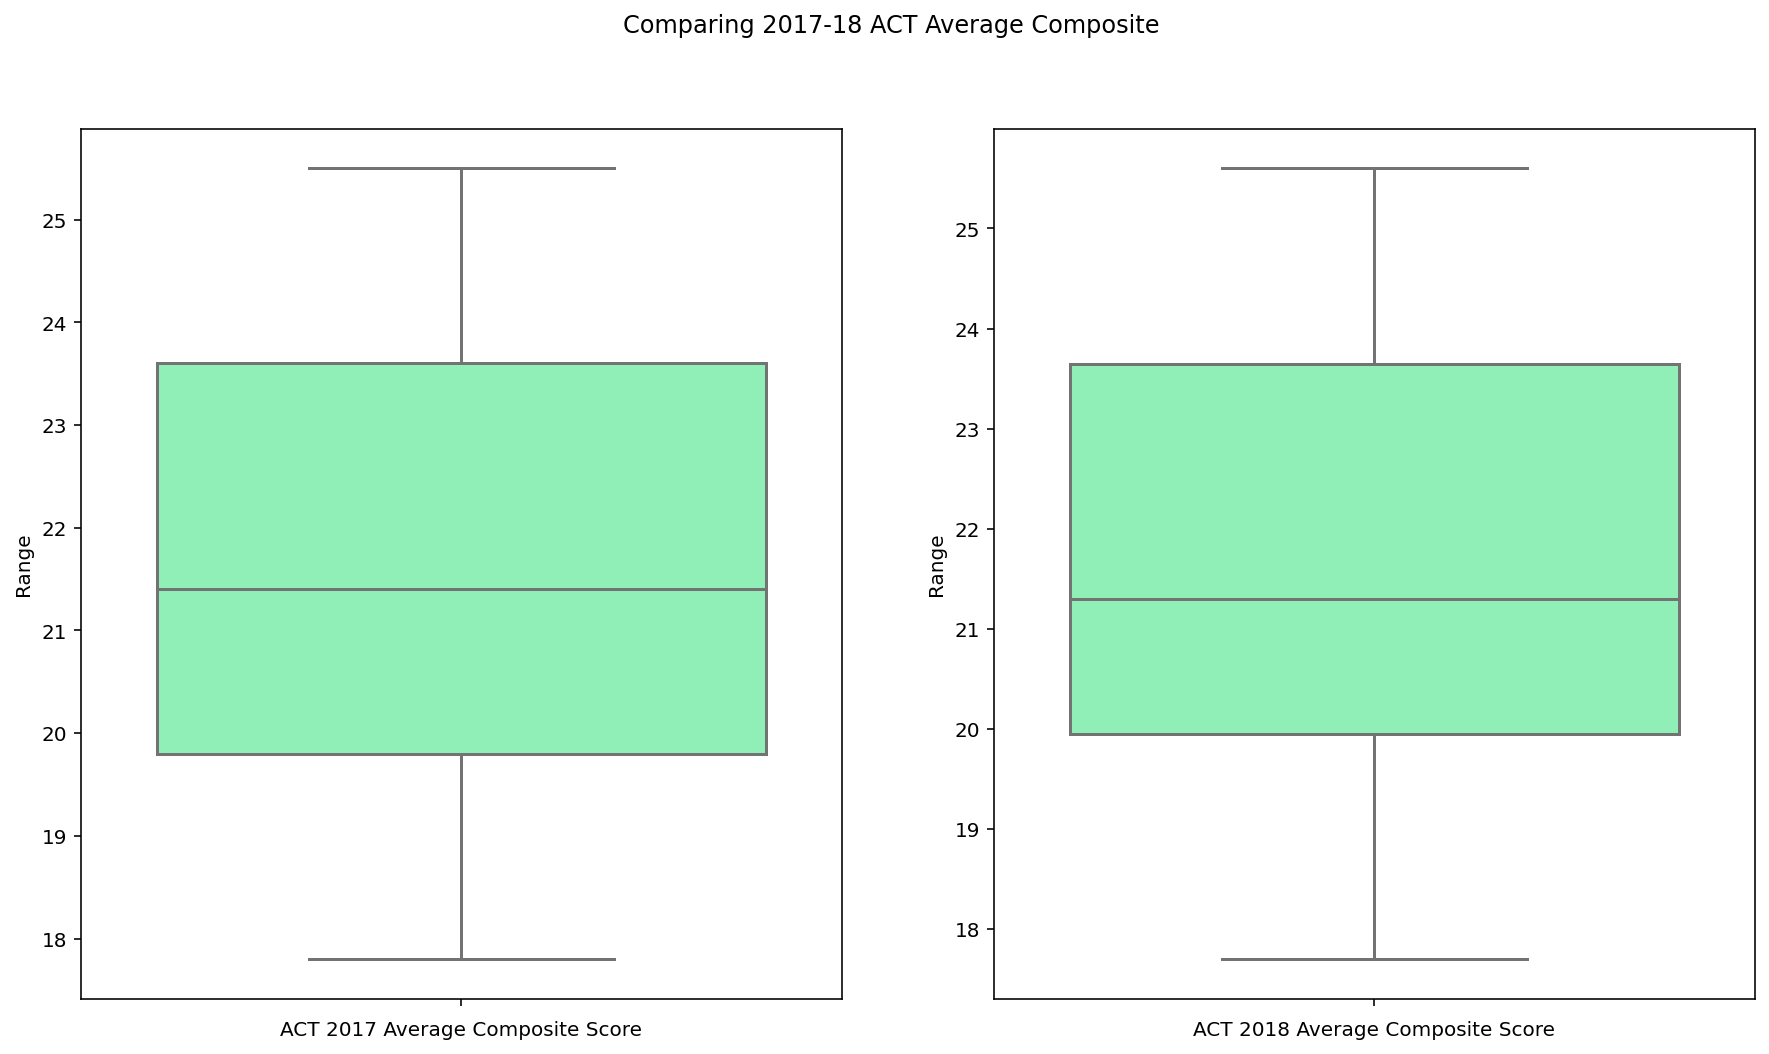

In [125]:
f, axes = plt.subplots(1, 2, figsize=(15,8))

f.suptitle('Comparing 2017-18 ACT Average Composite')

sns.boxplot(final['act_17_composite'], palette='rainbow', orient='v', ax=axes[0]).set(xlabel='ACT 2017 Average Composite Score',
                                                                             ylabel='Range');
sns.boxplot(final['act_18_composite'], palette='rainbow', orient='v', ax=axes[1]).set(xlabel='ACT 2018 Average Composite Score',
                                                                             ylabel='Range');

Comparing 2017-18 ACT Average Composite
- Generally, for both year the composite score remains similar. Median for both year was aroud 21.4, Q1 around 20, Q3 around 23.5. 

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'ACT 2017 Average English Score')]

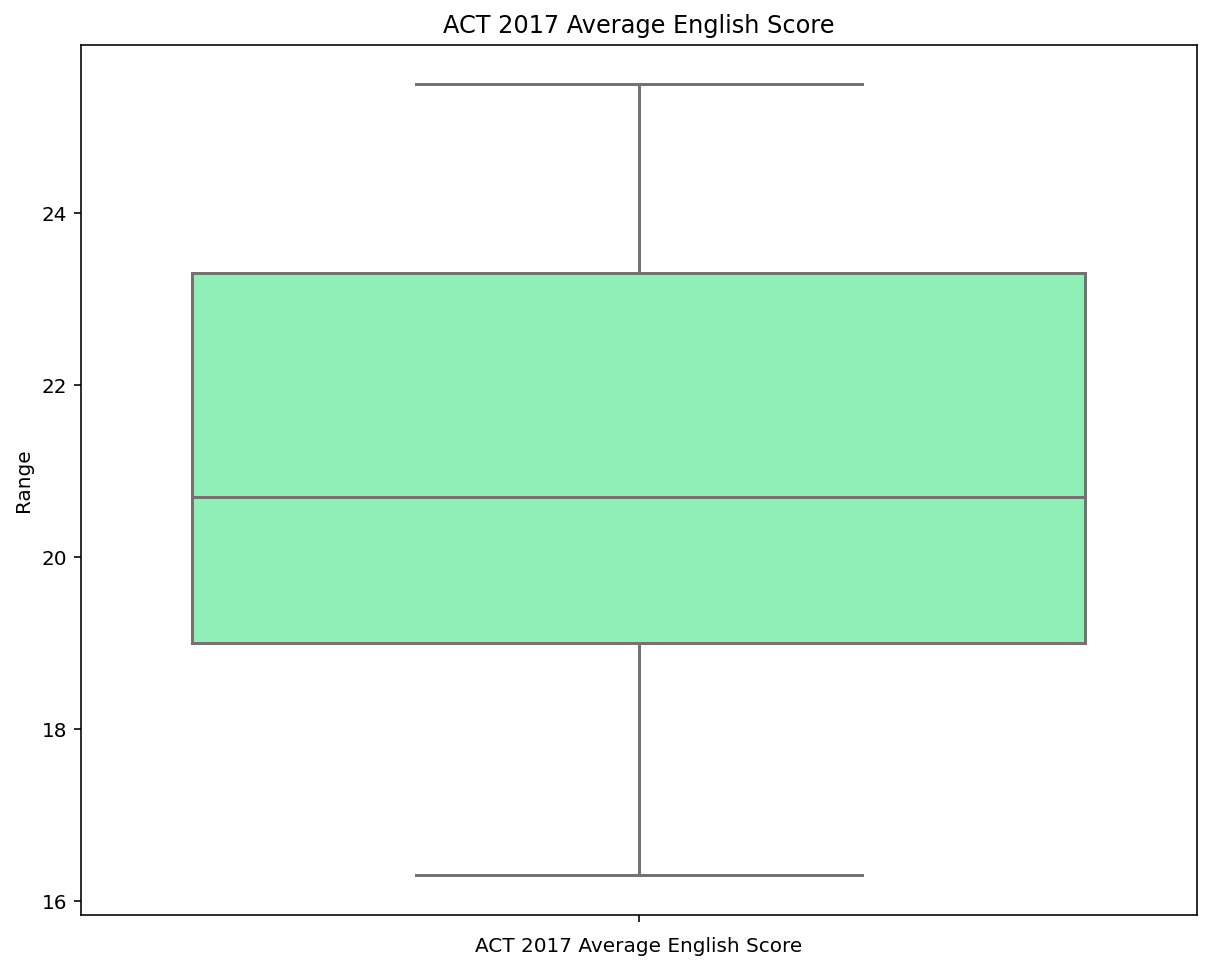

In [126]:
plt.figure(figsize=(10,8))
plt.title('ACT 2017 Average English Score')
sns.boxplot(final['act_17_english'], palette='rainbow', orient='v').set(xlabel='ACT 2017 Average English Score',
                                                                       ylabel='Range')

ACT 2017 Average English Score
- The median for 2017 was 20.7, Q1 was 19, Q3 was 23.3

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'ACT 2017 Average Math Score')]

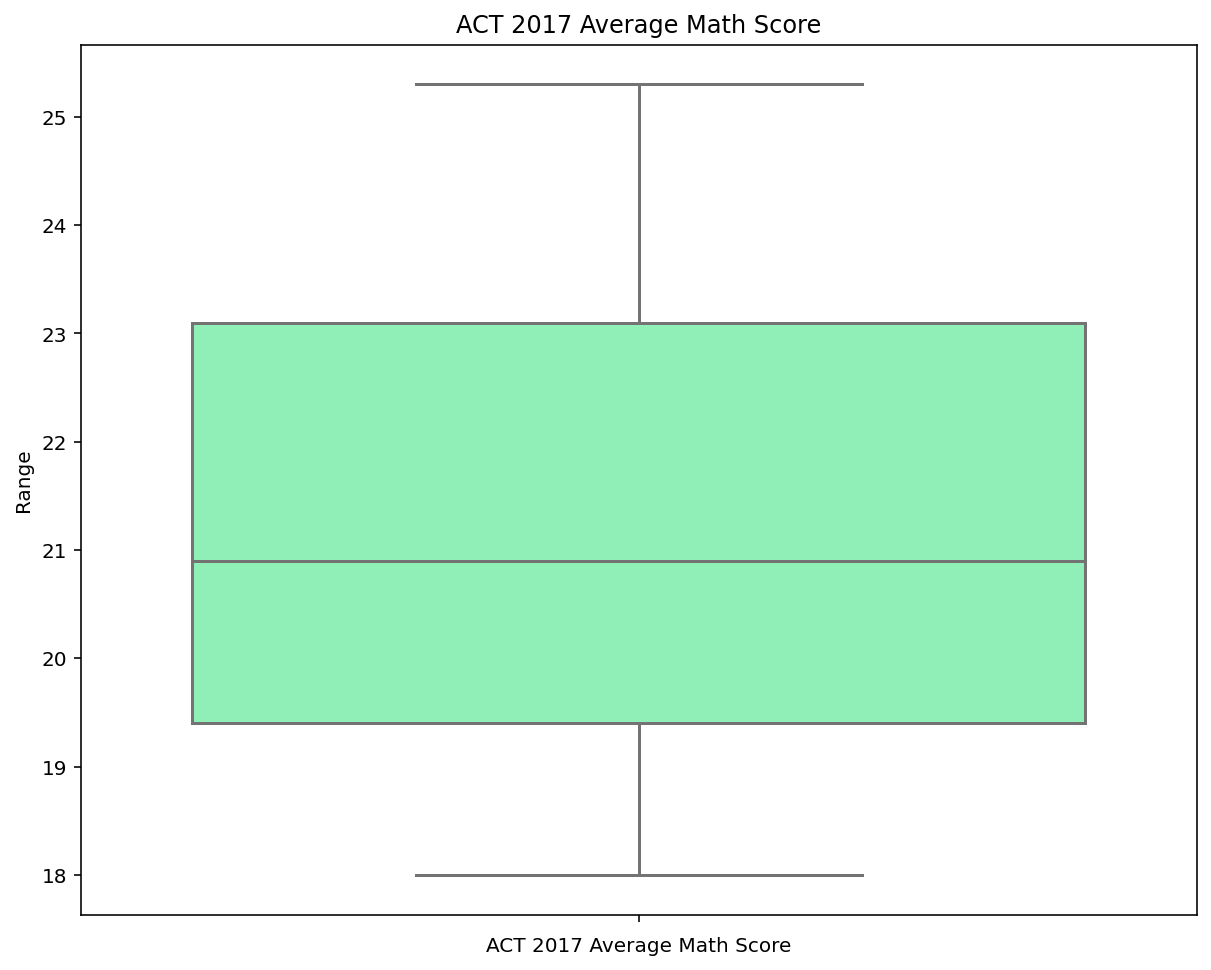

In [127]:
plt.figure(figsize=(10,8))
plt.title('ACT 2017 Average Math Score')
sns.boxplot(final['act_17_math'], palette='rainbow', orient='v').set(xlabel='ACT 2017 Average Math Score',
                                                                       ylabel='Range')

ACT 2017 Average Math Score
- Median was 20.9, Q1 was 19.4, Q3 was 23.1. No outliers

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'ACT 2017 Average Reading Score')]

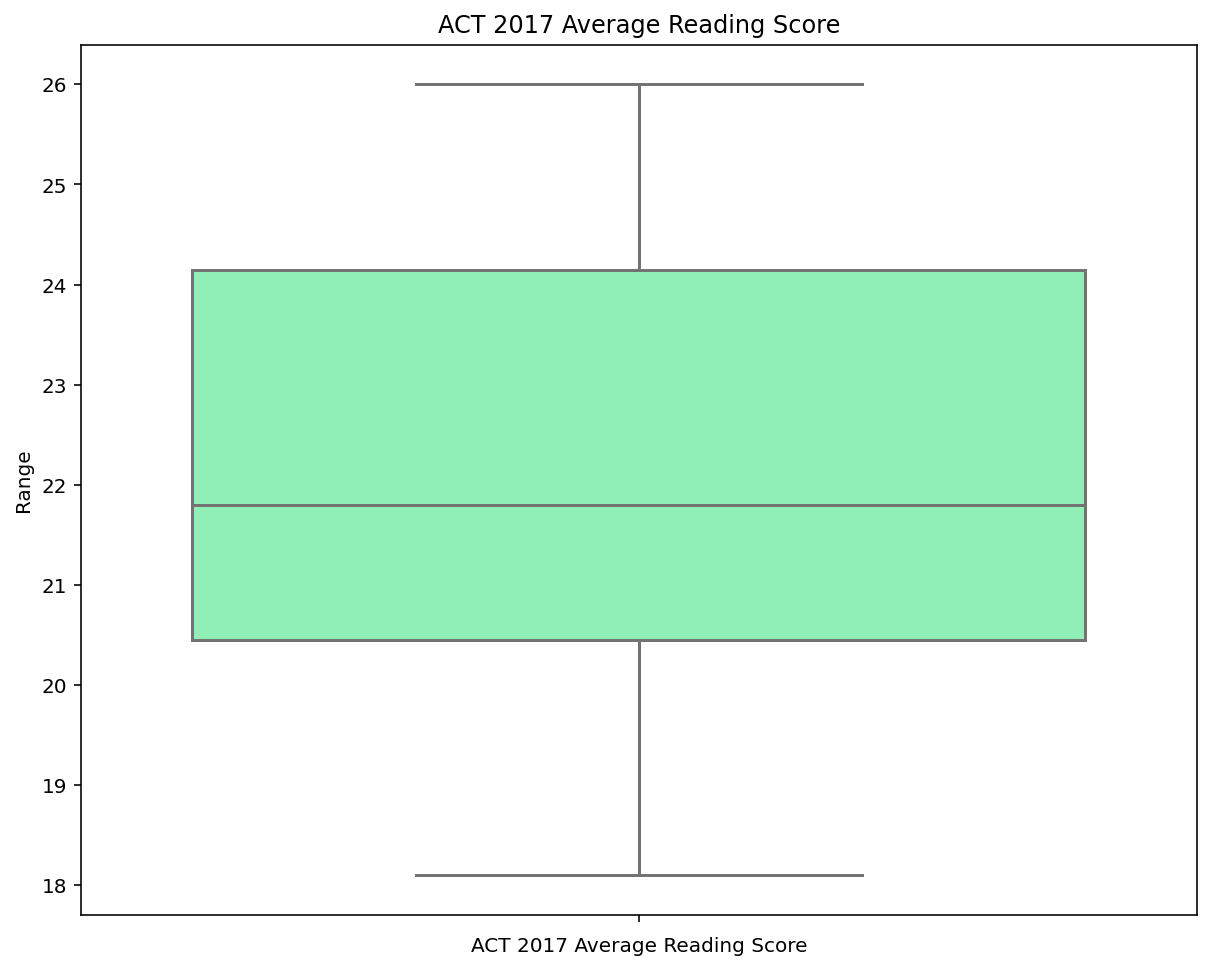

In [128]:
plt.figure(figsize=(10,8))
plt.title('ACT 2017 Average Reading Score')
sns.boxplot(final['act_17_reading'], palette='rainbow', orient='v').set(xlabel='ACT 2017 Average Reading Score',
                                                                       ylabel='Range')

ACT 2017 Average Reading Score
- Median was 21.8, Q1 was 20.45, Q3 was 24.15. There was no outliers. 

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'ACT 2017 Average Science Score')]

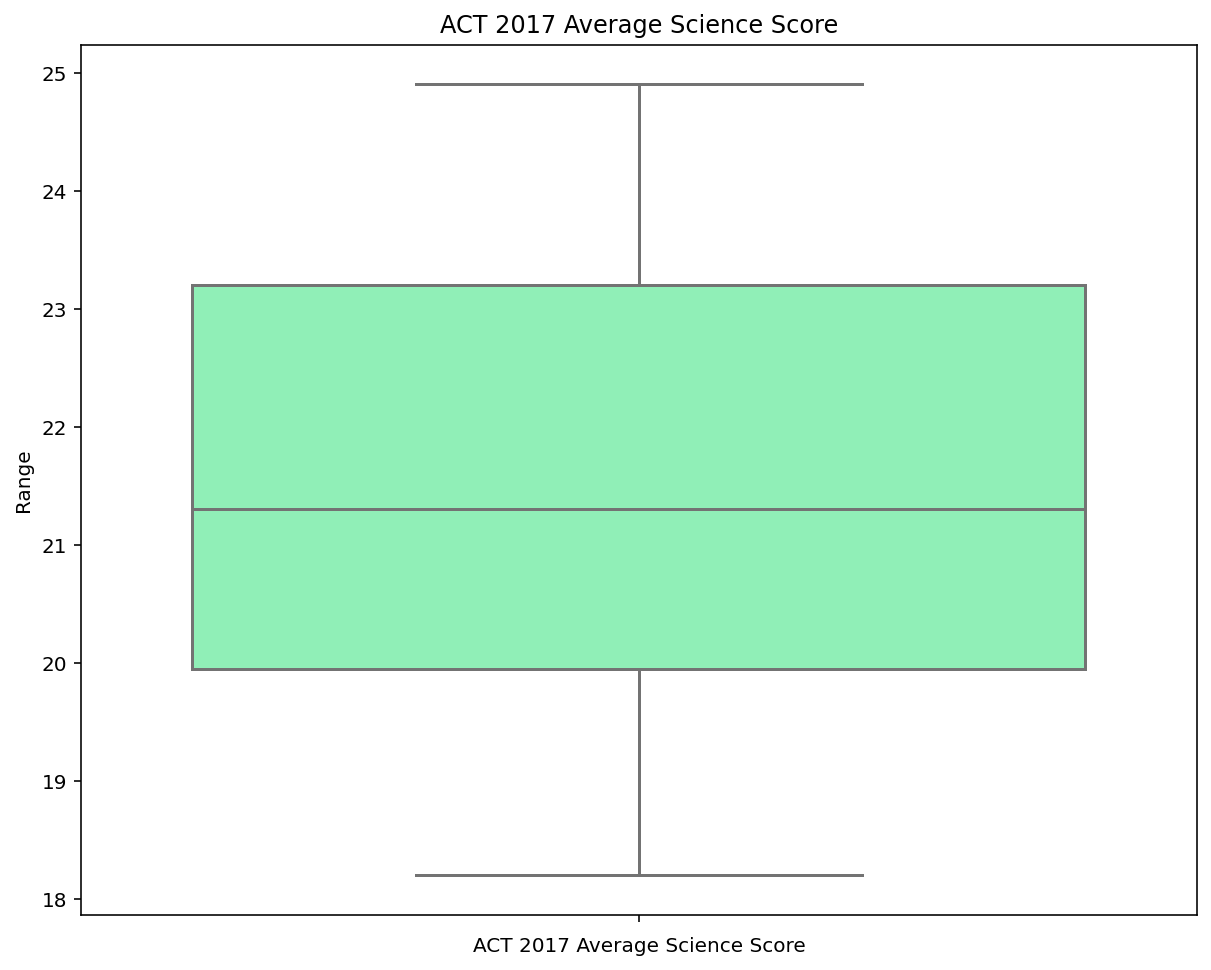

In [129]:
plt.figure(figsize=(10,8))
plt.title('ACT 2017 Average Science Score')
sns.boxplot(final['act_17_science'], palette='rainbow', orient='v').set(xlabel='ACT 2017 Average Science Score',
                                                                       ylabel='Range')

ACT 2017 Average Science Score
- Median was 21.3, Q1 was 19.95, Q3 was 23.2. No outliers. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

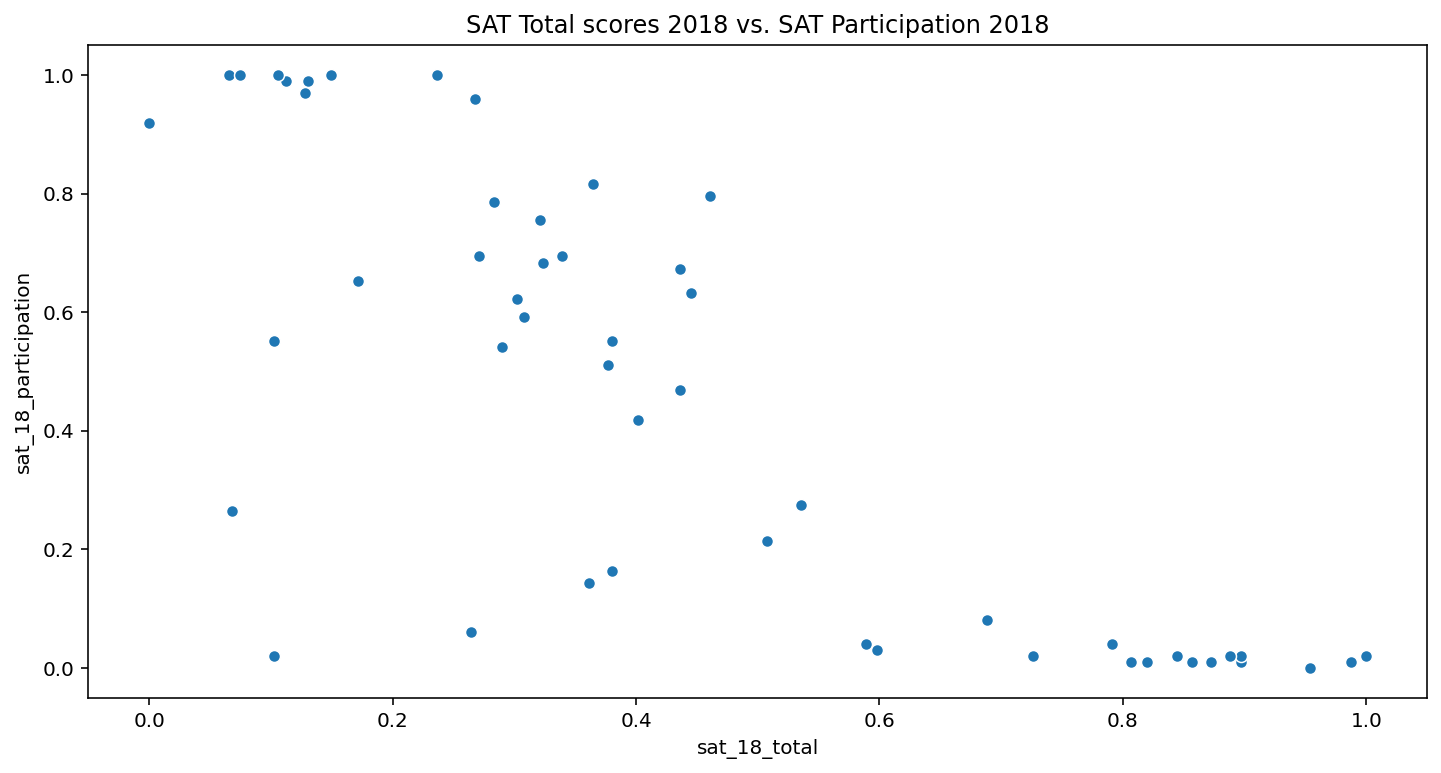

In [141]:
plt.figure(figsize=(12,6))
plt.title('SAT Total scores 2018 vs. SAT Participation 2018')
sns.scatterplot(x=scaled_final['sat_18_total'], 
                y=scaled_final['sat_18_participation'], 
                data=scaled_final, 
                palette= "coolwarm")

From the scatter plot, it can be clearly observed there is a moderate negative correlation between SAT participation and total score. The more people participate in SAT, the lower the score, the opposite is also true. 

Additional plots will be in Outside Research Section

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [130]:
from scipy.stats import shapiro

- H0: Variable is normally distributed 
- H1: Variable is not normally distributed
- p value = 0.05

In [131]:
def norm_test(final, col):
    stat, p = shapiro(final.iloc[:,1:])
    mean = round(final[col].describe()['mean'],2)
    std = round(final[col].describe()['std'],2)
    skew = round(stats.skew(final[col]),2)
    alpha = 0.05
    if p < alpha:
        print(f"{col} is not normally distributed: \n Mean = {mean}, std = {std}, skew = {skew} \n")
    else:
        print(f"{col} is normally distributed")

In [132]:
for i in final.columns[1:]:
    norm_test(final, i)

sat_17_participation is not normally distributed: 
 Mean = 0.4, std = 0.35, skew = 0.34 

sat_17_ebrw is not normally distributed: 
 Mean = 569.12, std = 45.67, skew = 0.26 

sat_17_math is not normally distributed: 
 Mean = 556.88, std = 47.12, skew = 0.35 

sat_17_total is not normally distributed: 
 Mean = 1126.1, std = 92.49, skew = 0.3 

act_17_participation is not normally distributed: 
 Mean = 0.65, std = 0.32, skew = -0.19 

act_17_english is not normally distributed: 
 Mean = 20.93, std = 2.35, skew = 0.34 

act_17_math is not normally distributed: 
 Mean = 21.18, std = 1.98, skew = 0.32 

act_17_reading is not normally distributed: 
 Mean = 22.01, std = 2.07, skew = 0.26 

act_17_science is not normally distributed: 
 Mean = 21.45, std = 1.74, skew = 0.21 

act_17_composite is not normally distributed: 
 Mean = 21.52, std = 2.02, skew = 0.31 

sat_18_participation is not normally distributed: 
 Mean = 0.46, std = 0.37, skew = 0.13 

sat_18_ebrw is not normally distributed: 
 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

The assumption does not hold for all 3 because they are not normally distributed:
- Math
- Reading
- Participation rate


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

It does not make sense to conduct statistical inference given these data. The dataset represents the participation and performance of all students across all US states. These data represents the population, not a sample. Satistical inference can only be made when we draw a sample from the population, we use the sample to make statistical inference on the population parameters.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

It is not appropriate to compare SAT and ACT math scores. Both tests are scored differently, testing topics are different as well. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The three states that demonstrate interesting trends are: District of Columbia, Colorado and Illinois.  

In 2018, there were 18 states that require ACT exam while 11 states require SAT exam. (Refer to figure 1 below, states that were highlighted in yellow favours ACT, red favours SAT and orange either ACT or SAT.) In the same year, SAT had surpassed rival ACT to reclaim it long-held position as the nations' most widely used college admission test. Nearly 2 million US students in the class of 2018 took the SAT during high school, compared with 1.91 million who took the ACT. This is the largest number of students in a graduating class to take the SAT.  

One possible reason for SAT's surge was College Board, which owns the SAT, pushed to expand its market share in recent years by revising the test and entering into deals with numerous states and school systems to give students the exam. 

Another reason would be the SAT School Day Program, which allows students take the SAT during regular school hours usually at no cost, continues to exapnd. 36% fo the class of 2018 participated in the program, compared to 27% in 2017. Besides that, all income-eligible student can take the SAT for free with a fee waiver. Even if low-income students take the SAT during the school day, they can take the SAT again two more times, at no cost, on a weekend. Note all states pays for the student's SAT exam. (Refer to figure 2, the gray and green states does not pay for student's SAT exam).  

Lastly, SAT's growth validated the decision to launch a new version in 2016 with less of the tricky vocabulary that was long a hallmark of the test. The new version also dropped the 'guessing penalty', a feature that deducted points for wrong answers. This makes SAT more straightforward and approachable. 

However, it it worth mentioning the negative correlation between average SAT participation rate and total score. The more the students participate in SAT the lower the score the student gets. Similarly, all SAT subjects has a negative correlation with participation rate. A high SAT score is required to get into desired college, the high participation but lower score is a worrying trend. 

For example, Districit of Columbia, it has a very high participation rate (92%) but it has the lowest average total score. On the other hand, Minnesota has a very low participation rate (4%) but it has the highest average total score. (See Figure 4). The lowest participating states were the highest scoring states.  

Another state that demonstrated interesting trend is Colorado. On April 11th, 2017 all Colorado high school juniors will take SAT. In 2016, only 5500 Colorado students took the test. However, from April 2017 every junior will have to take SAT. This saw Colorado participation rate increased from 11% in 2017 to 55% in 2018. (See Table 1 and Figure 3) 

Lastly, the state of Illinois in April 2017 began offering SAT to all juniors in public high schools. As a result, SAT usage in that state spiked from 12,402 in the Class of 2017 to 145,919 in the Class of 2018. ACT usage in the state dropped by more than half, from 134,901 in the Class of 2017 to 62,626 in 2018. One reason for the switch was because SAT lines up with the state curriculum. Students are able to take a practice version, called the PSAT, in 10th grade. Students can get help through free online tutoring, and students can take the real SAT in 11th grade. (See Table 1 and Figure 3)

However, states such as Arizona, District of Columbia, Florida and Nevada exprienced a drop in SAT participation 2018. These states all had a low average total in 2018. Similary in 2018, their total were also lower than other thats. (See Table 2)

Finally, ACT still remains attractive to some states. In 2018, 7 states increased their participation in ACT compared to 2017.


Citations:

https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever

https://www.testive.com/state-sat-act/

https://www.testive.com/colorado-sat-change-2017/

https://www.testive.com/illinois/

https://www.chicagotribune.com/news/breaking/ct-iillinois-act-exam-met-20170414-story.html

https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/

https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take

Figure 1: States favouring SAT or ACT
<div>
<img src="https://2aih25gkk2pi65s8wfa8kzvi-wpengine.netdna-ssl.com/hs/files/2017/05/bcc0207f-6fdd-4400-b7b4-30d6e4c8b0b5-600x398.png" width="800"/>
</div>

Figure 2: States that sponsor SAT or ACT
<div>
<img src="https://2aih25gkk2pi65s8wfa8kzvi-wpengine.netdna-ssl.com/hs/files/2017/05/eb9b3978-5178-4ff4-8153-24f8e1150279-768x537.png" width="800"/>
</div>

In [134]:
# Table 1
final[(final['sat_17_participation']<0.2) & (final['sat_18_participation']>0.9)]

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4,0.99,513,506,1019,0.43,23.9


Figure 3
<div>
<img src="output.png" width="800"/>
</div>

Text(0.5, 1.0, 'Highest Average SAT Total 2018 vs SAT 2018 Participation Rate')

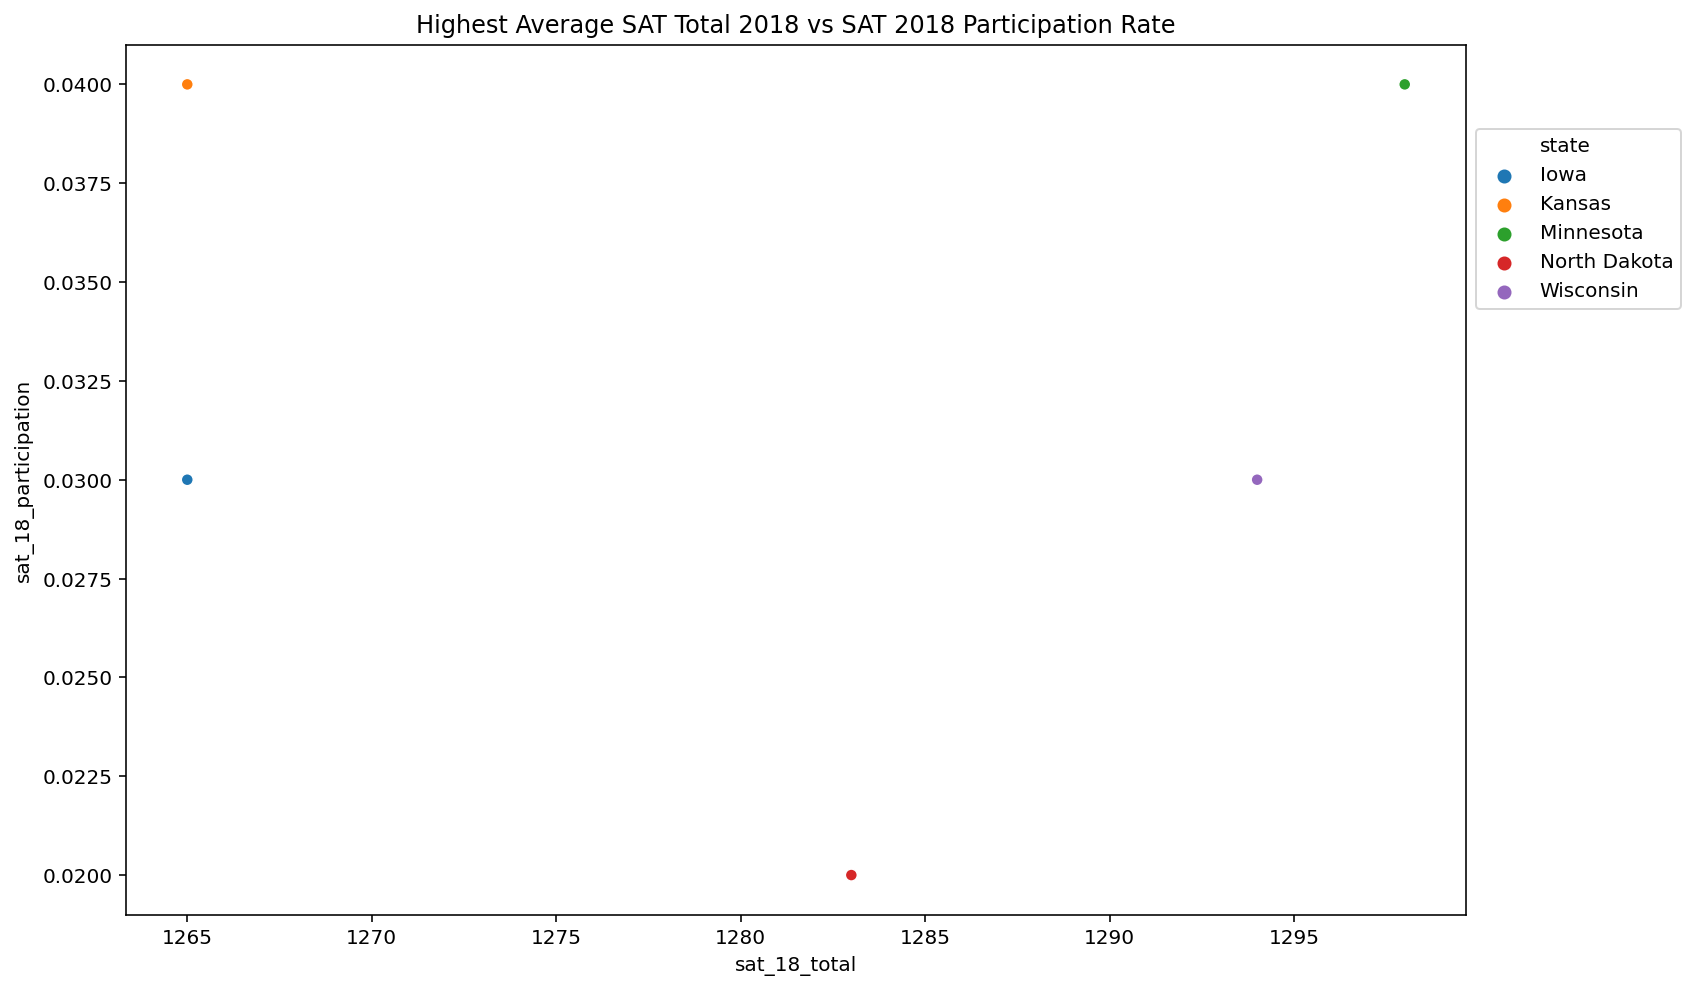

In [135]:
# Figure 4
plt.figure(figsize=(12,8))
g = sns.scatterplot(x=final[final['sat_18_total'] >=1265]['sat_18_total'], 
                    y=final['sat_18_participation'],
                    hue=final[final['sat_18_total']>=1265]['state'])

g.legend(loc='center left', bbox_to_anchor=(1, 0.8), ncol=1)
plt.title('Highest Average SAT Total 2018 vs SAT 2018 Participation Rate')

In [136]:
# Table 2
final[final['sat_17_participation'] > final['sat_18_participation']] 
# States that decrease in SAT participation

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7


In [137]:
# Table 3
final[final['act_17_participation'] < final['act_18_participation']] 
# States that increase in ACT participation

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
20,Maryland,0.69,536,524,1060,0.28,23.3,23.1,24.2,23.2,23.6,0.76,545,535,1080,0.31,22.5
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.00,20.1
31,New Mexico,0.11,577,561,1138,0.66,18.6,19.4,20.4,20.0,19.7,0.16,552,540,1093,0.67,19.4
35,Ohio,0.12,578,570,1149,0.75,21.2,21.6,22.5,22.0,22.0,0.18,552,547,1099,1.00,20.3
37,Oregon,0.43,560,548,1108,0.40,21.2,21.5,22.4,21.7,21.8,0.48,564,553,1117,0.42,21.3


In [138]:
# Table 4
final.sort_values('sat_18_participation').head()

,state,sat_17_participation,sat_17_ebrw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebrw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2,0.03,633,625,1257,1.00,20.0
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,21.8,0.03,622,618,1240,0.77,21.9
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.00,20.1
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Kansas is chosen to provide suggestions for College Board. Kansas has the lowest SAT participation rate among the states but has one of the higest SAT test score (See figure 4). Besides that, according to American School and University, Kansas was ranked top 6 in student to population ratio . This means that Kansas has a large student population (193,733). It would be a great boost if SAT can win Kansas over. Moreover, Kansas is a state sitting on the fence, it does not favour either SAT or ACT (See figure 1). My suggestions based on the marketing 4ps are as follows:

Product: Creating an equal platform for students to succeed 
- The current strategy for SAT is to increase participation rate. However, there is a strong negative correlation between participation rate and total score. This means that the more students participate the worse the total score. SAT could restructure its exam to better suit curriculums in Kansas and other states. For example, revising the tricky vocabulary section had proven to be a success. SAT could improve access to test materials, allocating resource to ease the financial burden of students. Besides that, SAT school day program could be extended to Kansas, making it easy for students to take the exam during school days instead on weekends. Giving students an equal platform to score well would be a better strategy than merely looking to increase participation rate. 

Price: Make SAT affordable to Kansas
- Kansas currently does not pay for students to take SAT exam.(See figure 2, Kansas is one of the grey states) This means that students will have to pay on their own for test preparation and actual test. Income eligible students could get the test fee and test prepation fees waived. It would be ideal for Kansas state to sponsor test fees for its students, SAT could provide a discount to entice Kansas. SAT could offer 2 subsequent free test for students in Kansas.  

Place: Ready support to students
- SAT could offer mock exams to 10th graders before they take the actual exam in 11th grade. Besides mock exam, more test prepartion material could be released at 10th grade so as to allow students to familiarise with SAT. Test prep material could be provided in schools and online so as to allow easy access to learning material for students. With more support, students will have better chance to score well and therefore more confident to take SAT. 

Promotion: Position SAT as a brand that help students to succeed 
- According to broadband search, 94.4% of Kansas residents have wireline internet available to them. Therefore, online promotion strategy would be ideal. Besides that, our target population are the schools and state council. They are the ones who decide on policies such as which test will be make mandatory. Therefore, getting the support of the traditonal media would be advantageous. Promote on creditable jornals would enhance the image of SAT. The brand message could be the varies strategies the SAT uses that help students succed, for instance the product, price and place mentioned above.  

citation:
https://www.asumag.com/research/top-10s/article/20856007/states-with-most-college-students-as-a-percentage-of-population

https://broadbandnow.com/Kansas

https://www.usnews.com/news/education-news/articles/2019-09-24/more-students-are-taking-the-sat-than-ever-before

## Future Data Collection Considerations:

1. The exact number of students in each state who took either SAT or ACT. Reason being, some state may have a very small participation percentage but the exact number of students might be higher than those states that have higher participation percentage because the state has many more students. 
2. The total number of students for the year in each state. Same reason as point 1. 
3. The population of each state and general demographics (Sample Social demographic data). Assess the student population to general population, some state may face ageing problem or low birth rate or low disposable income that might contribute to low participation or bias towards one test (ACT or ACT). 
4. The type of schools (Public or Private or district) that participated in SAT or ACT. Might show some trend on participation percentage and average score. 
5. Provide samples of student test scores instead of overall state average.  